In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

# With CIBIL Score

## 1. Data Understanding

### Load Data Set

In [ ]:
# Load dataset
df = pd.read_csv('loan_approval_dataset.csv')

### Preliminary Look at the data

### Sample of data

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Column Description

- **loan_id**: Unique identifier for each loan.
- **no_of_dependents**: Number of dependents.
- **education**: Whether the applicant is a graduate or not.
- **self_employed**: Whether the applicant is self-employed.
- **income_annum**: Annual income of the applicant.
- **loan_amount**: The amount of loan requested.
- **loan_term**: The term of the loan.
- **cibil_score**: CIBIL score of the applicant.
- **residential_assets_value**: Value of residential assets.
- **commercial_assets_value**: Value of commercial assets.
- **luxury_assets_value**: Value of luxury assets.
- **bank_asset_value**: Value of bank assets.
- **loan_status**: The status of the loan (Approved or Rejected).


In [ ]:
# Counts the number of unique values in each column
unique_values_per_column = df.nunique()

print(unique_values_per_column)

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64


In [ ]:
# Displays up to the first 10 unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")

loan_id: [ 1  2  3  4  5  6  7  8  9 10]
 no_of_dependents: [2 0 3 5 4 1]
 education: [' Graduate' ' Not Graduate']
 self_employed: [' No' ' Yes']
 income_annum: [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000]
 loan_amount: [29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000
  2200000  4300000]
 loan_term: [12  8 20 10  4  2 18 16 14  6]
 cibil_score: [778 417 506 467 382 319 678 782 388 547]
 residential_assets_value: [ 2400000  2700000  7100000 18200000 12400000  6800000 22500000 13200000
  1300000  3200000]
 commercial_assets_value: [17600000  2200000  4500000  3300000  8200000  8300000 14800000  5700000
   800000  1400000]
 luxury_assets_value: [22700000  8800000 33300000 23300000 29400000 13700000 29200000 11800000
  2800000  3300000]
 bank_asset_value: [ 8000000  3300000 12800000  7900000  5000000  5100000  4300000  6000000
   600000  1600000]
 loan_status: [' Approved' ' Rejected']


In [ ]:
# Clean column names if there are extra spaces
df.columns = df.columns.str.strip()

# Ensure there are no extra spaces in the loan_status values
df['loan_status'] = df['loan_status'].str.strip()

# Ensure there are no extra spaces in the education and self_employed values
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()


## 2. Exploratory Data Analysis (EDA)

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['education',  'self_employed', 'loan_status']

numericals = ['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value',
              'commercial_assets_value','luxury_assets_value','bank_asset_value']

### 2.1 Distribution of Numerical Columns

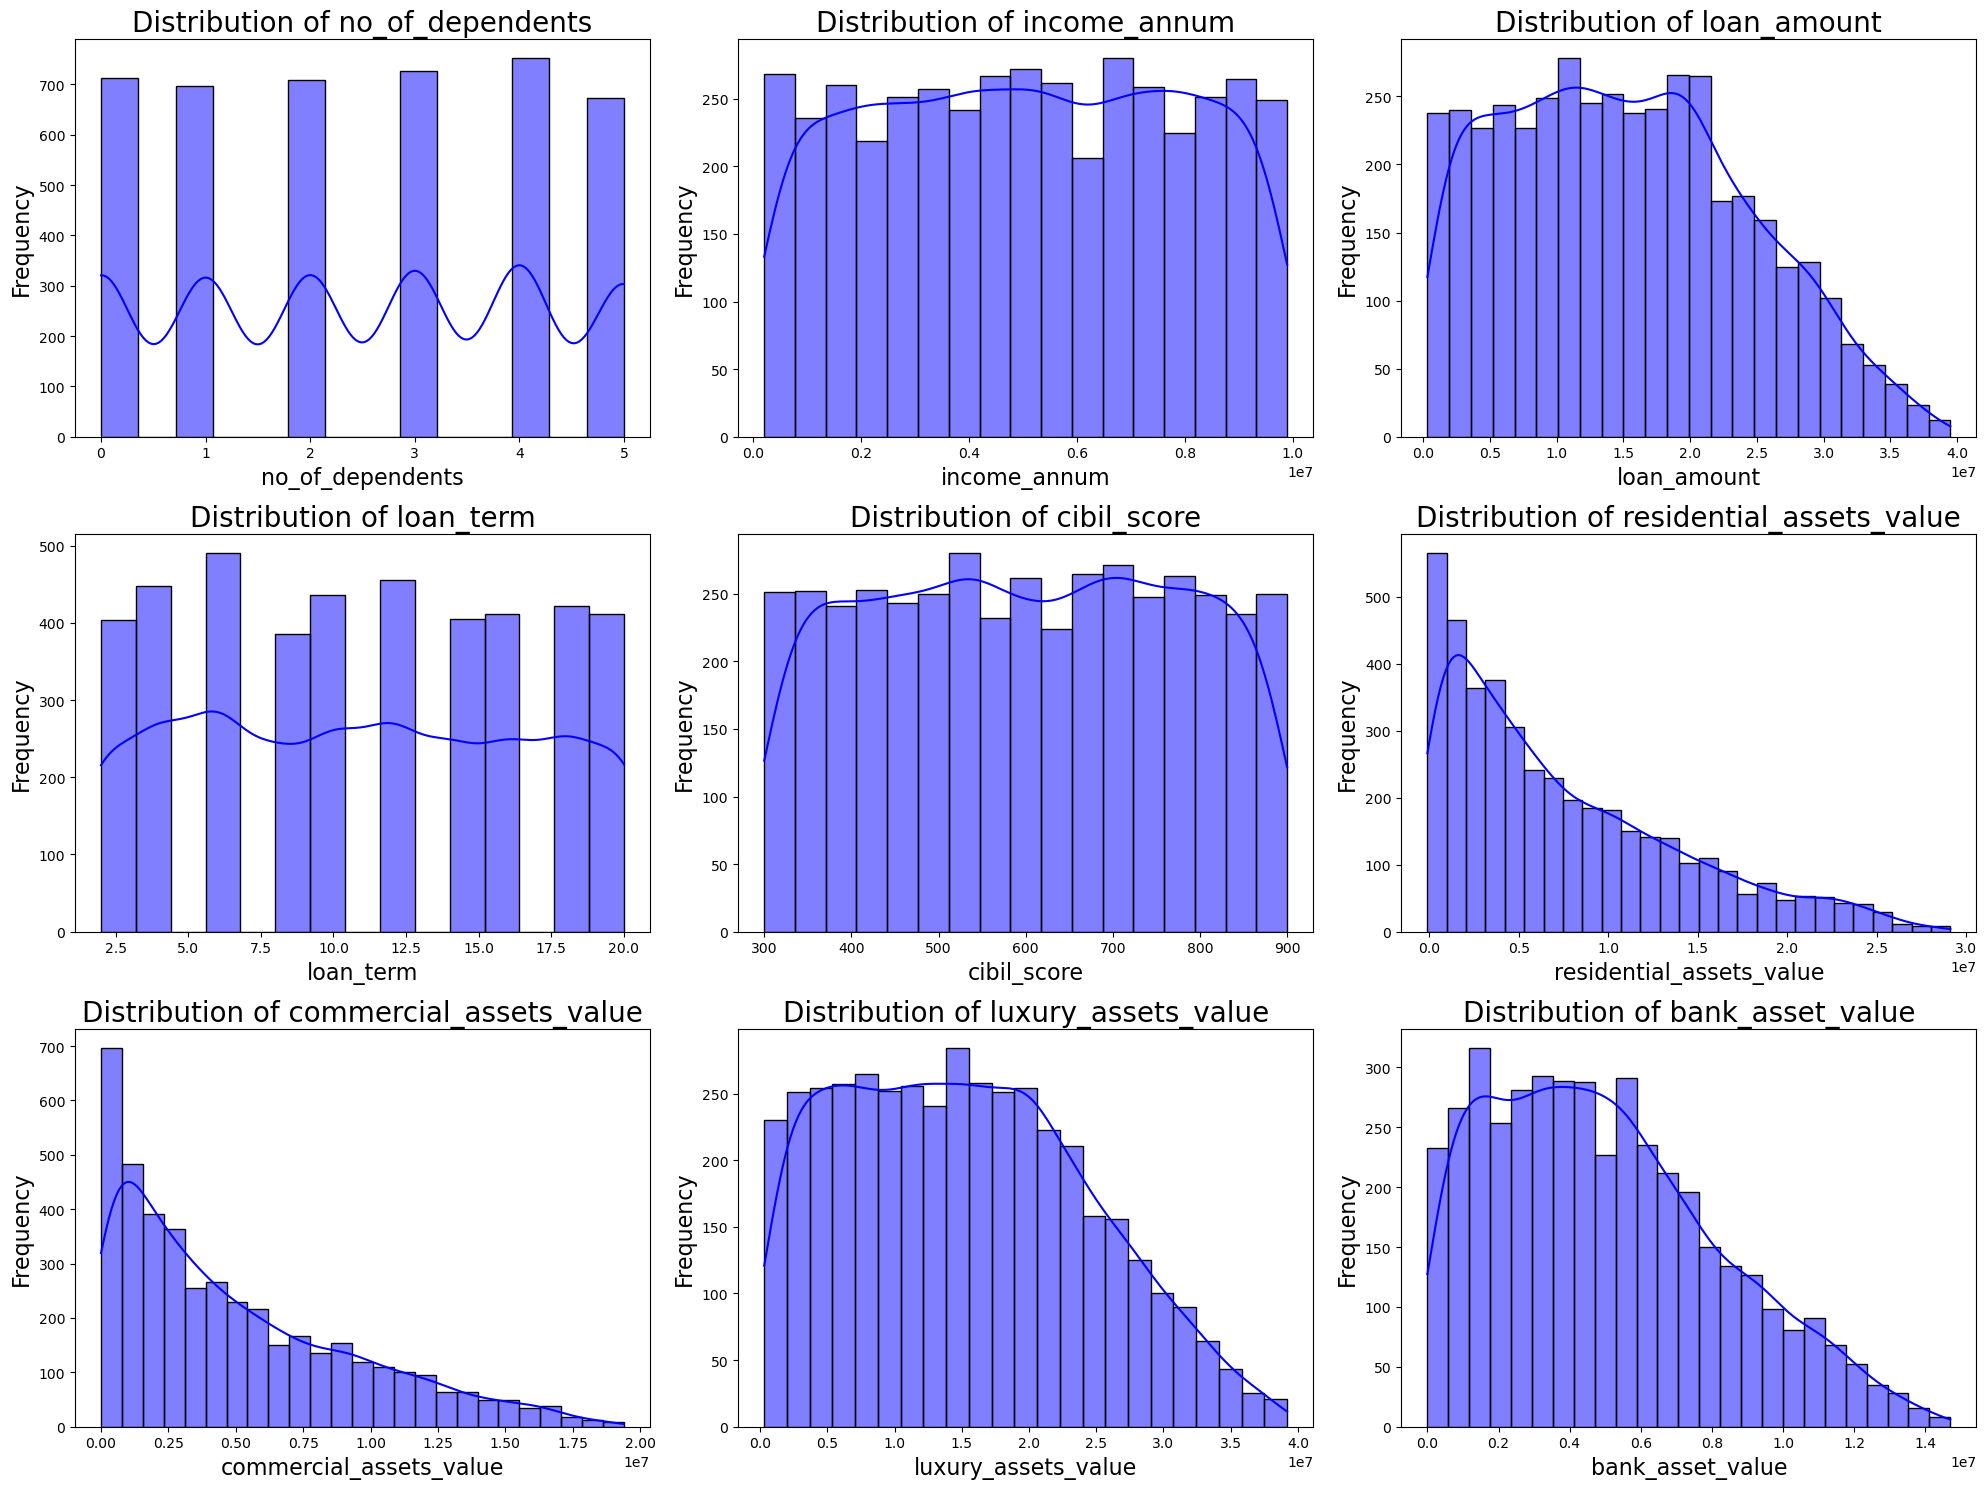

In [ ]:
# 2.1 Distribution of Numerical Columns
# Adjust the figure size to fit all plots
plt.figure(figsize=(20, 15))

# Automatically calculate the number of rows and columns
num_plots = len(numericals)
cols = 3  # You can set the number of columns
rows = (num_plots + cols - 1) // cols  # Calculate the required number of rows

# Plotting univariate for numeric columns
for i in range(num_plots):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[numericals[i]], kde=True, color='blue')
    plt.title(f'Distribution of {numericals[i]}', fontsize=20)  # Increase font size of the title
    plt.xlabel(numericals[i], fontsize=16)  # Increase font size of the x-axis label
    plt.ylabel('Frequency', fontsize=16)  # Increase font size of the y-axis label

# Add spacing between the plots
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust the values to set the spacing

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


### 2.2 Distribution of Categorical Columns

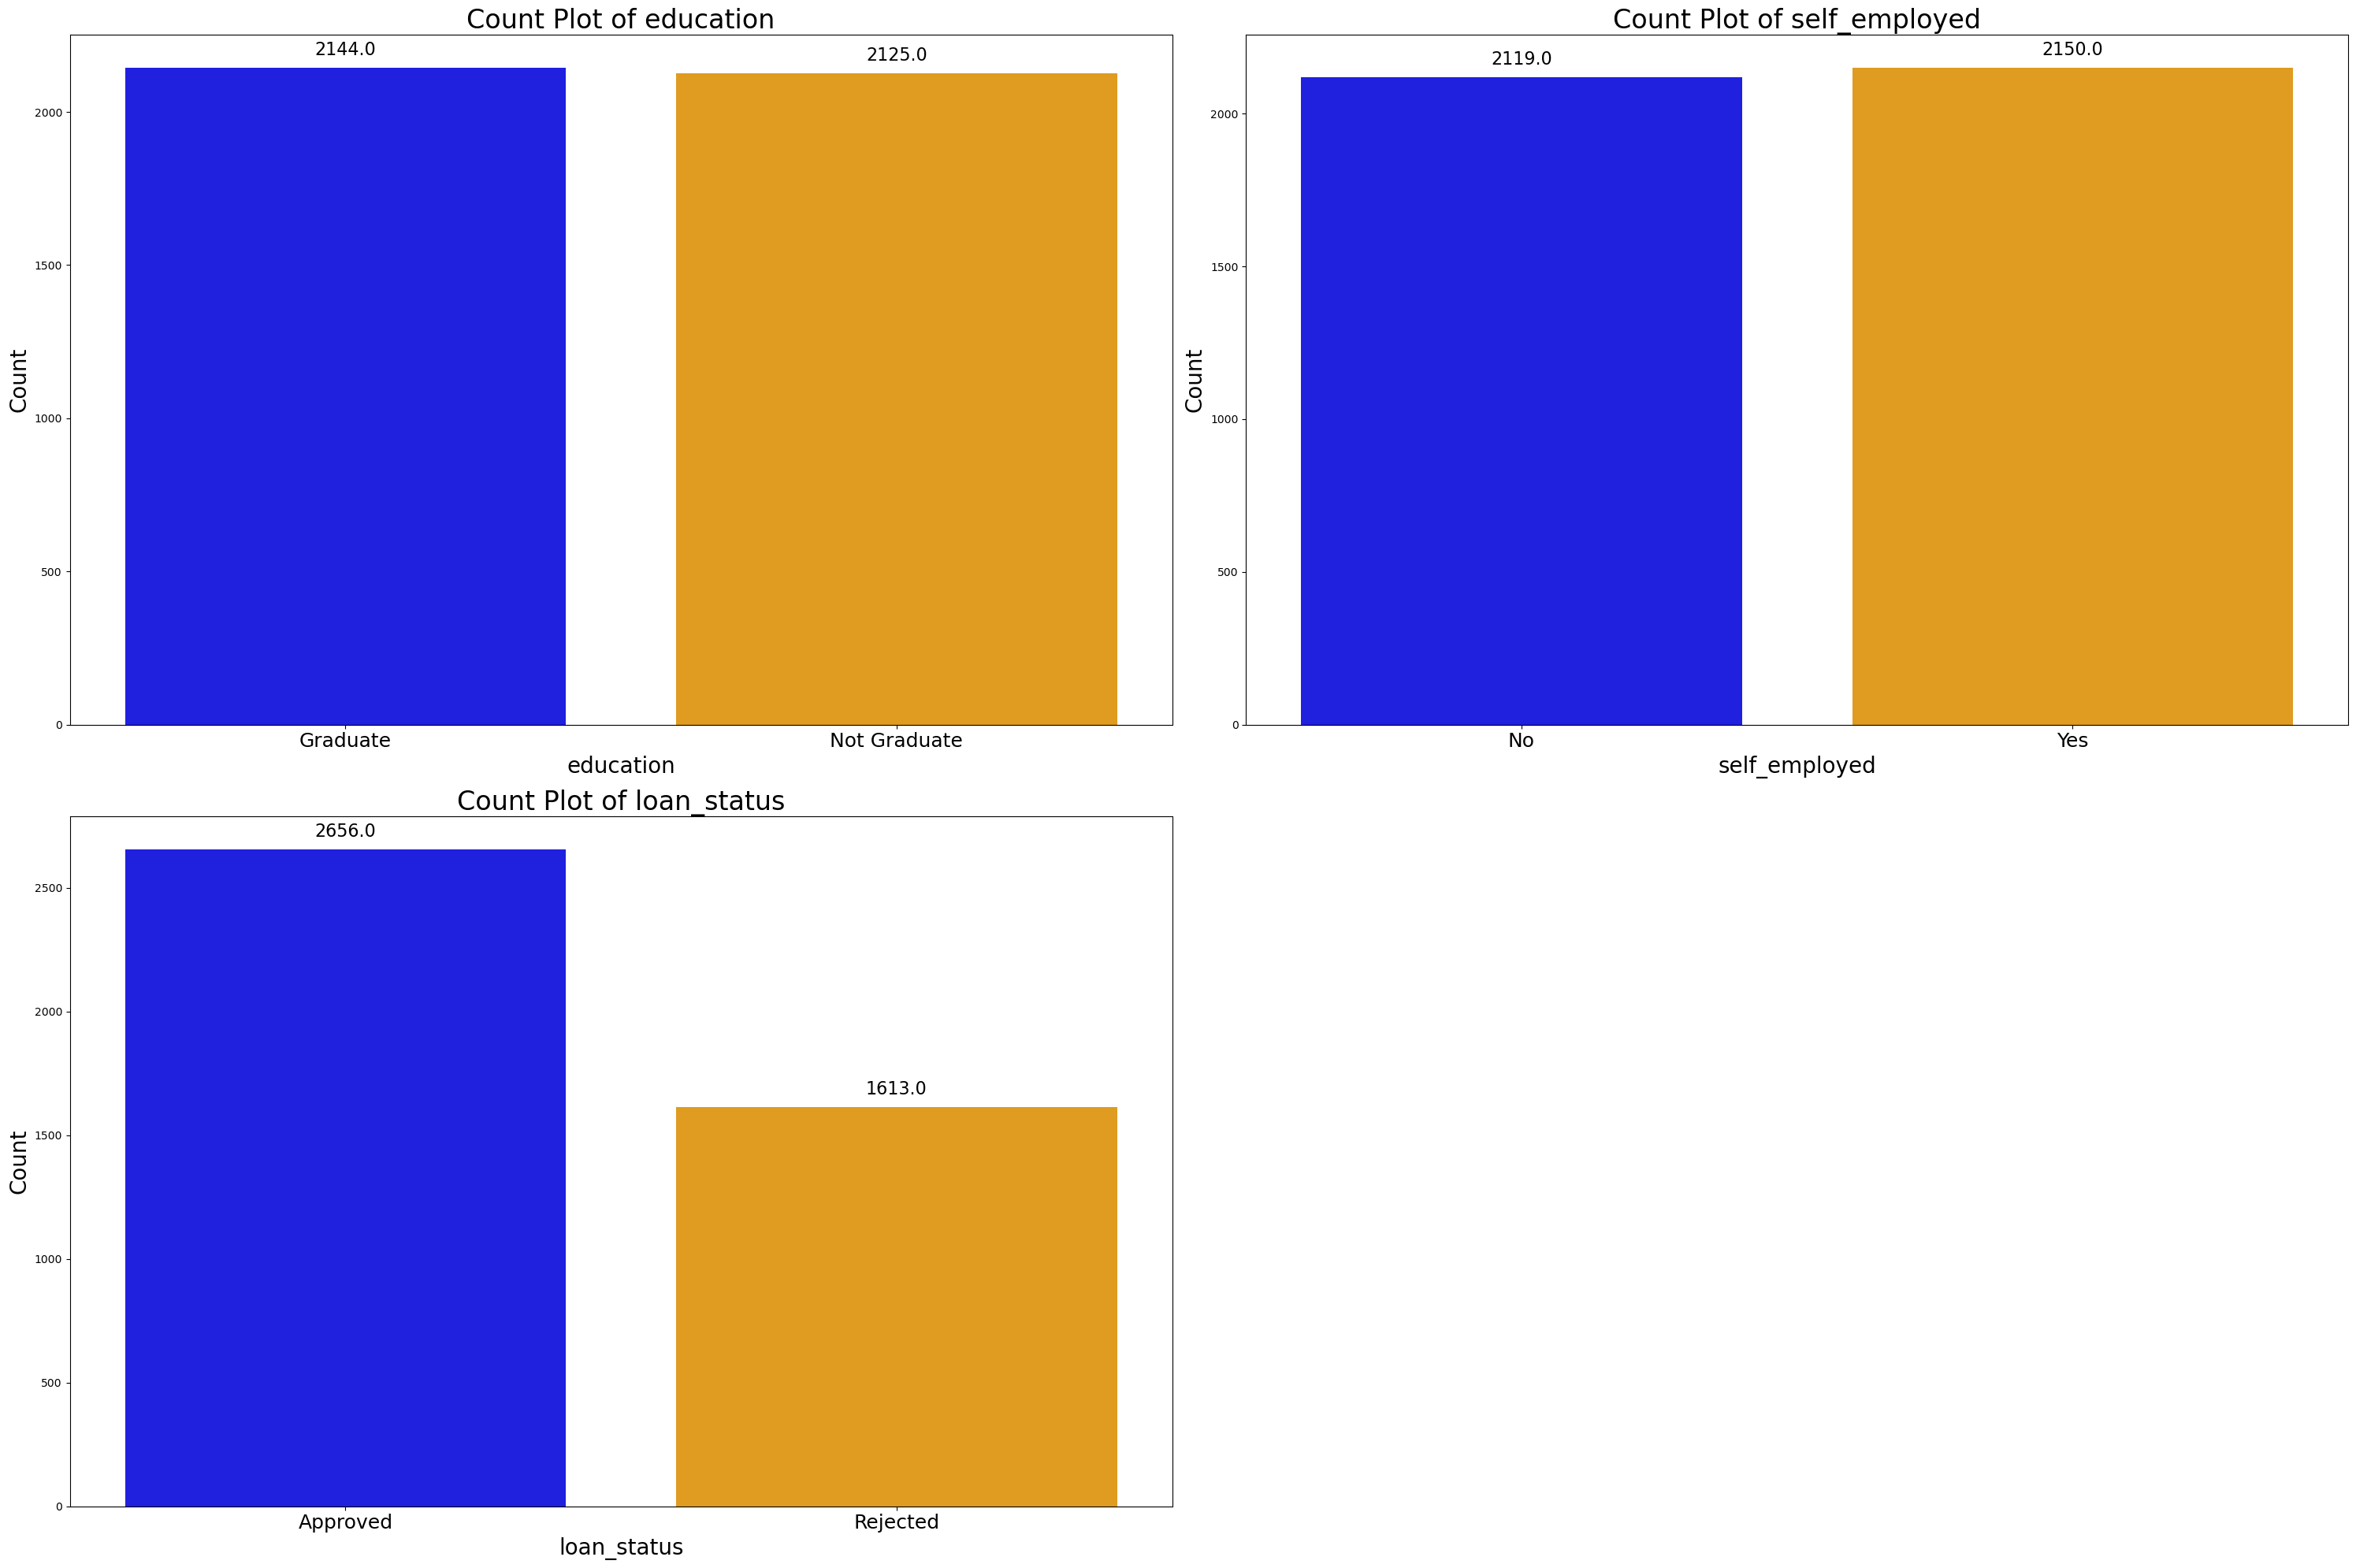

In [ ]:
# 2.2 Distribution of Categorical Columns
# Determine the number of subplots per row
num_cols = 2  # Set the number of columns to 2
num_rows = (len(categoricals) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 10))
axes = axes.flatten()

# Display count plot for each categorical column
for idx, col in enumerate(categoricals):
    ax = sns.countplot(x=col, data=df, palette=['blue', 'orange'], ax=axes[idx])  # Change color here
    ax.set_title(f'Count Plot of {col}', fontsize=24)  # Increase font size of the title
    ax.set_xlabel(col, fontsize=20)  # Increase font size of the x-axis label
    ax.set_ylabel('Count', fontsize=20)  # Increase font size of the y-axis label

    # Add rotation to the x-axis labels to avoid tilting
    ax.tick_params(axis='x', rotation=0, labelsize=18)  # Font size for x-axis labels

    # Annotate the count above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 8), textcoords='offset points', fontsize=16)  # Increase font size of annotations

# Remove any empty axes
for j in range(len(categoricals), len(axes)):
    fig.delaxes(axes[j])

# Add spacing between tables and between titles and tables
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust the values to set the spacing

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


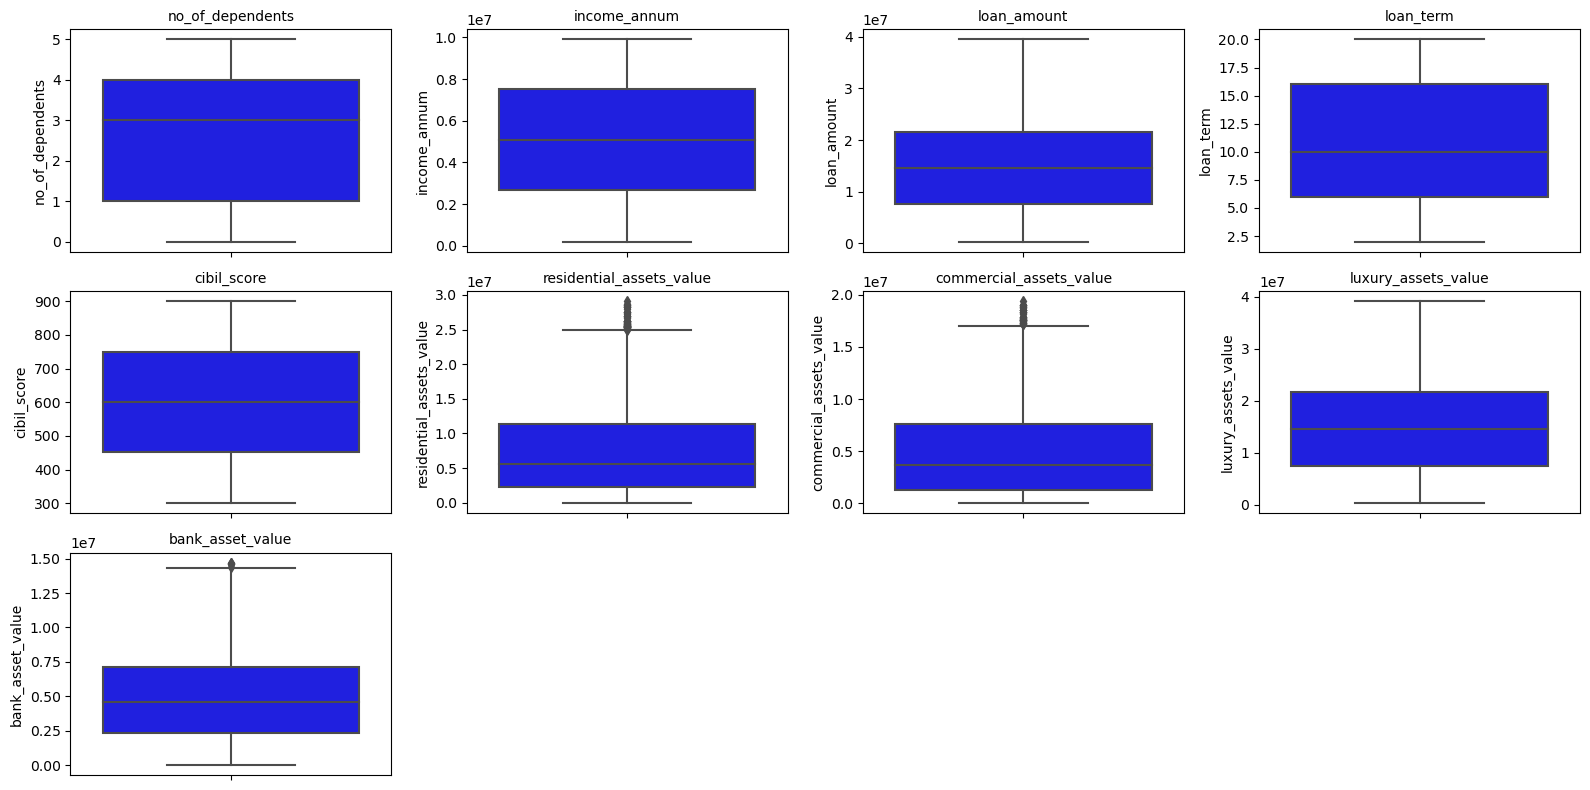

In [ ]:
# Check outlier
# Adjust the figure size for better readability
plt.figure(figsize=(16,8))

# List of new features to plot
features = ['no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value',
              'commercial_assets_value','luxury_assets_value','bank_asset_value']

# Loop through the features and plot
for i in range(len(features)):
    plt.subplot(3, 4, i+1)  # Adjust layout to 3 rows and 4 columns for better spacing
    sns.boxplot(y=df[features[i]], color='blue')
    plt.title(features[i], fontsize=10)
    plt.tight_layout()  # Adjusts subplot layout to prevent overlap

plt.show()


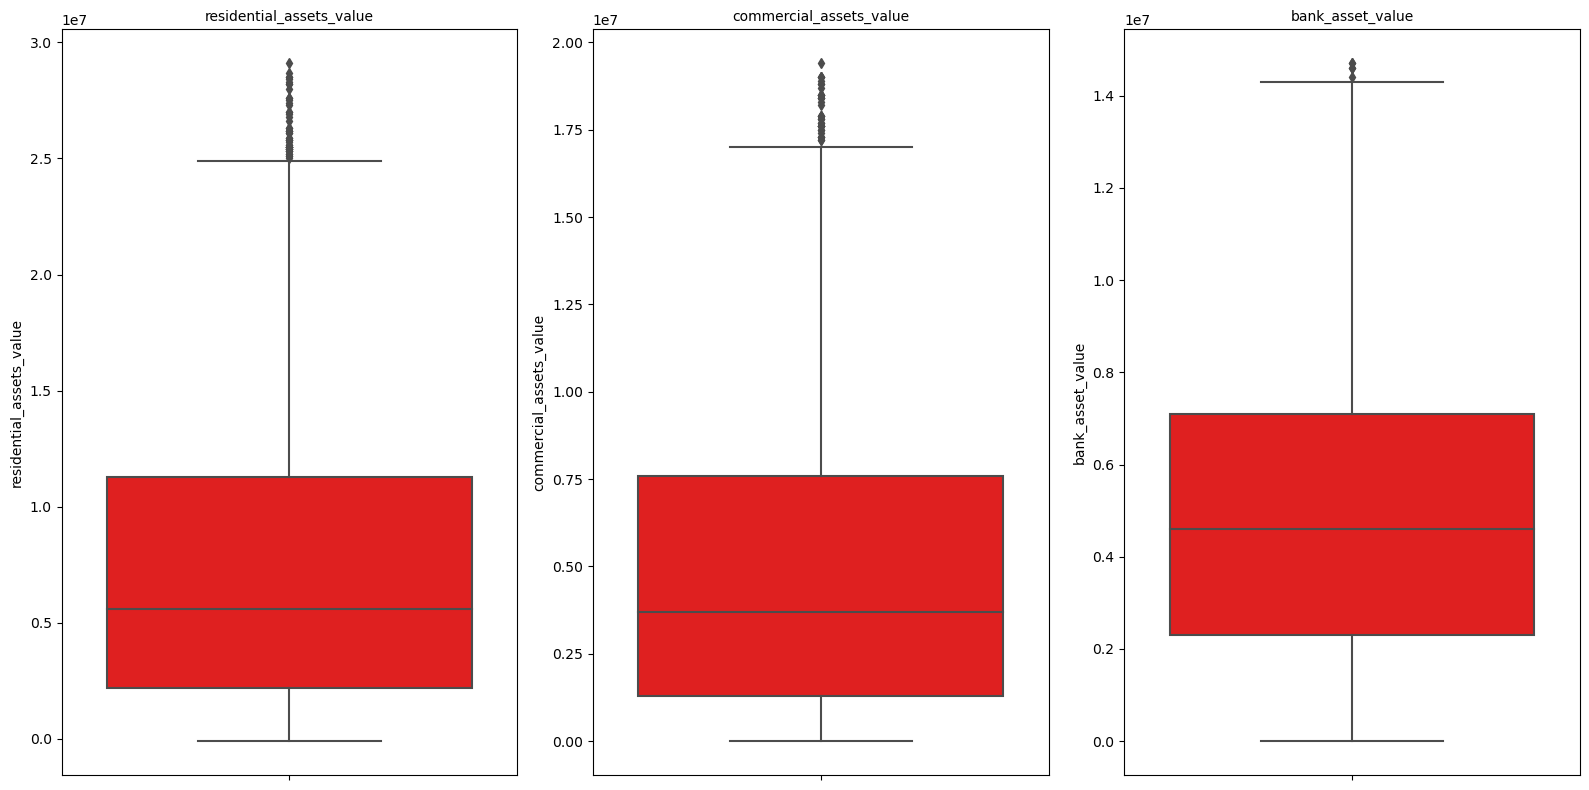

In [ ]:
# Adjust the figure size for better readability
plt.figure(figsize=(16,8))

# List of new features to plot
features = ['residential_assets_value','commercial_assets_value','bank_asset_value']

# Loop through the features and plot
for i in range(len(features)):
    plt.subplot(1, 3, i+1)  # Adjust layout to 1 rows and 3 columns for better spacing
    sns.boxplot(y=df[features[i]], color='red')
    plt.title(features[i], fontsize=10)
    plt.tight_layout()  # Adjusts subplot layout to prevent overlap

plt.show()


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## 3. Data Preprocessing

### 3.1 Check for Missing Value

In [ ]:
# 1. Check for missing values
missing_values = df.isnull().sum()
missing_values


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### 3.2 Check for duplicate data

In [ ]:
# 2. Check for duplicate data
duplicates = df.duplicated().sum()
print("Duplicate Values:\n", duplicates)


Duplicate Values:
 0


### 3.3 Cek Outlier

In [ ]:
# 3. Check for outliers
# Checking for negative values in numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns
anomalies = {col: df[df[col] < 0][col].count() for col in numeric_columns}
anomalies


{'loan_id': 0,
 'no_of_dependents': 0,
 'income_annum': 0,
 'loan_amount': 0,
 'loan_term': 0,
 'cibil_score': 0,
 'residential_assets_value': 28,
 'commercial_assets_value': 0,
 'luxury_assets_value': 0,
 'bank_asset_value': 0}

In [ ]:
# Remove rows containing negative values in numerical columns and update df
df = df[(df[numeric_columns] >= 0).all(axis=1)]
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### Statistical summary

In [ ]:
# numerical statistical summary
df[numericals].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4241.000000,4.241000e+03,4.241000e+03,4241.000000,4241.000000,4.241000e+03,4.241000e+03,4.241000e+03,4.241000e+03
mean,2.497996,5.074251e+06,1.517840e+07,10.902146,599.685687,7.522613e+06,4.985121e+06,1.517121e+07,4.991488e+06
std,1.695599,2.803166e+06,9.034490e+06,5.708988,172.277302,6.495800e+06,4.391504e+06,9.094717e+06,3.249494e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.400000e+06
50%,3.000000,5.100000e+06,1.460000e+07,10.000000,600.000000,5.700000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,747.000000,1.140000e+07,7.700000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# describe method on categorical data
df[categoricals].describe()

,education,self_employed,loan_status
count,4241,4241,4241
unique,2,2,2
top,Graduate,Yes,Approved
freq,2127,2135,2640


In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of education column
Graduate        2127
Not Graduate    2114
Name: education, dtype: int64 

Value counts of self_employed column
Yes    2135
No     2106
Name: self_employed, dtype: int64 

Value counts of loan_status column
Approved    2640
Rejected    1601
Name: loan_status, dtype: int64 



### 3. 4. Creating New Features

In [ ]:
# Create a copy of df as df1
df1 = df.copy()

# Function to categorize CIBIL score
def categorize_cibil(score):
    if score < 550:
        return 'Very Poor'
    elif score < 650:
        return 'Poor'
    elif score < 700:
        return 'Fair'
    elif score < 750:
        return 'Good'
    else:
        return 'Excellent'

df1.loc[:, 'cibil_category'] = df1['cibil_score'].apply(categorize_cibil)

# Check the results of df1
df1.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_category
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Very Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Very Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Very Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Very Poor


In [ ]:
# Creating new features
# 1. Total asset value
df1['total_assets_value'] = (df1['residential_assets_value'] +
                             df1['commercial_assets_value'] +
                             df1['luxury_assets_value'] +
                             df1['bank_asset_value'])  # Total asset value

# 3. Debt to Income Ratio
# Assume we use loan_amount as the total debt requested
df1['debt_to_income_ratio'] = df1['loan_amount'] / df1['income_annum']

# 4. Calculating Loan to Value Ratio
df1['loan_to_value_ratio'] = df1['loan_amount'] / df1['total_assets_value']  # Using the previously created total_assets_value

# Liability ratio
df1['dependents_to_income_ratio'] = df1['no_of_dependents'] / df1['income_annum']


In [ ]:
# Removing unnecessary columns
df1.drop(['residential_assets_value', 'commercial_assets_value',
           'luxury_assets_value', 'bank_asset_value'], axis=1, inplace=True)


### 3.5 Deep Dive EDA

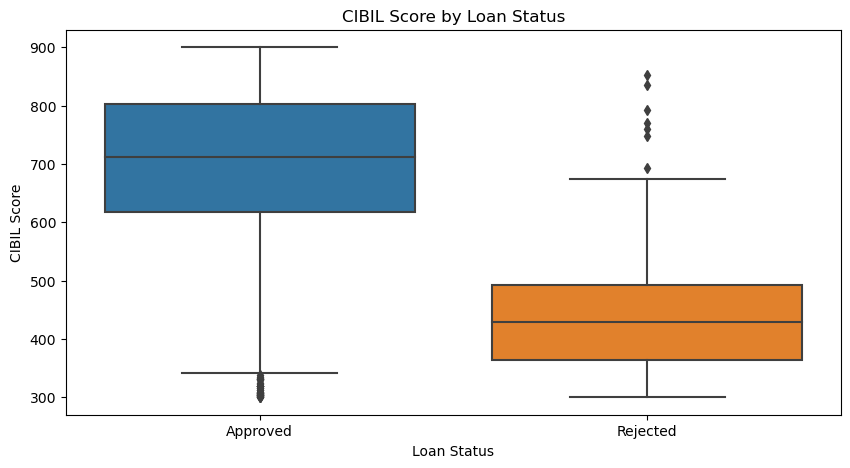

In [ ]:
# Examine the relationship between CIBIL Score and Loan Status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x='loan_status', y='cibil_score')
plt.title('CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()


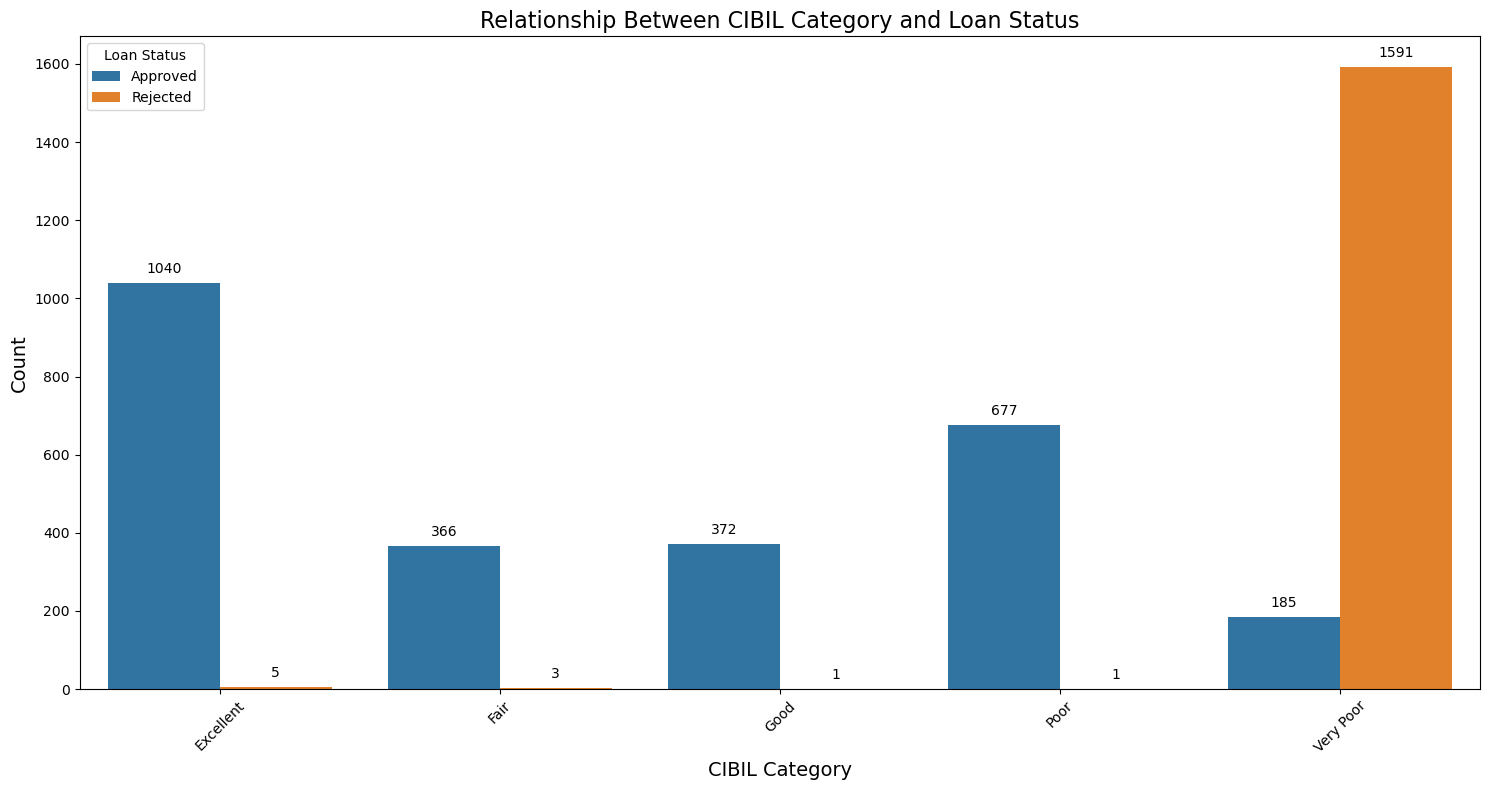

In [ ]:
# Calculate the frequency for the combination of cibil_category and loan_status
frequency = df1.groupby(['cibil_category', 'loan_status']).size().reset_index(name='count')

# Create a bar chart with a larger size
plt.figure(figsize=(15, 8))  # Change the figure size here
bar_plot = sns.barplot(data=frequency, x='cibil_category', y='count', hue='loan_status')

# Set labels and title
plt.xlabel('CIBIL Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Relationship Between CIBIL Category and Loan Status', fontsize=16)
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()

# Add numbers on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Distance between the number and the bar
                      textcoords='offset points')

# Show the plot
plt.show()


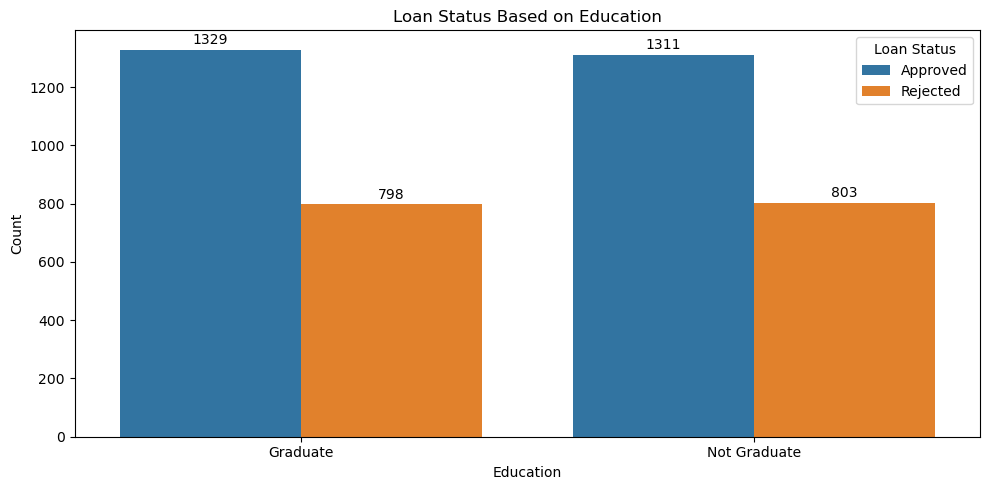

In [ ]:
# Loan Status Based on Education

# Create the plot
plt.figure(figsize=(10, 5))
count_plot = sns.countplot(data=df1, x='education', hue='loan_status')
plt.title('Loan Status Based on Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Add numbers on top of the bars, with a slight adjustment downwards
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 2),  # Move the number slightly down
                        textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

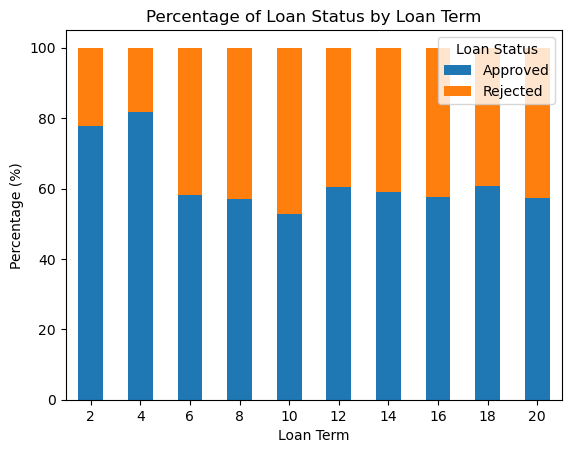

In [ ]:
# Calculate total and count for each loan_term
loan_counts = df1.groupby(['loan_term', 'loan_status']).size().reset_index(name='count')

# Calculate total for each loan_term
total_counts = loan_counts.groupby('loan_term')['count'].sum().reset_index(name='total')

# Merge total counts with loan_counts
loan_counts = loan_counts.merge(total_counts, on='loan_term')

# Calculate percentage
loan_counts['percentage'] = (loan_counts['count'] / loan_counts['total']) * 100

# Prepare data for plotting
# Pivoting data so that loan status becomes columns
pivot_data = loan_counts.pivot(index='loan_term', columns='loan_status', values='percentage').fillna(0)

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a stacked bar chart
pivot_data.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Percentage of Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Show the chart
plt.legend(title='Loan Status', loc='upper right')
plt.show()


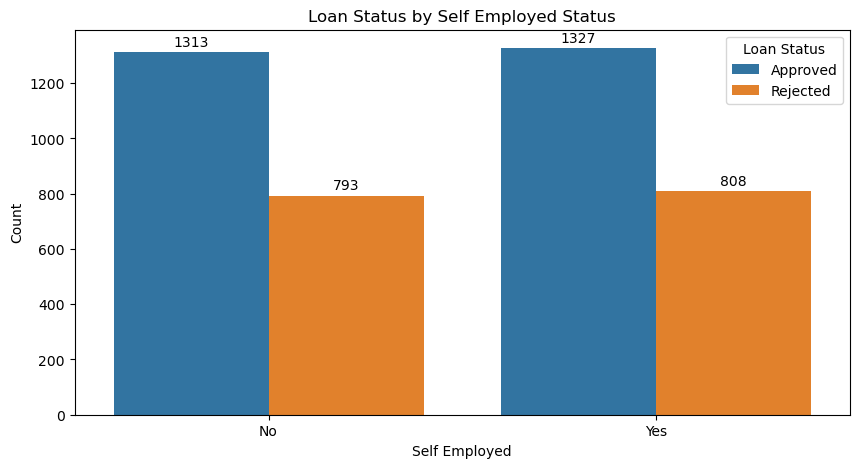

In [ ]:
# Create the plot
plt.figure(figsize=(10, 5))
count_plot = sns.countplot(data=df1, x='self_employed', hue='loan_status')

# Add numbers above the bars
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 2),  # Distance between the number and the bar (change 3 to 2)
                        textcoords='offset points')

# Add title and labels
plt.title('Loan Status by Self Employed Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Display the chart
plt.show()


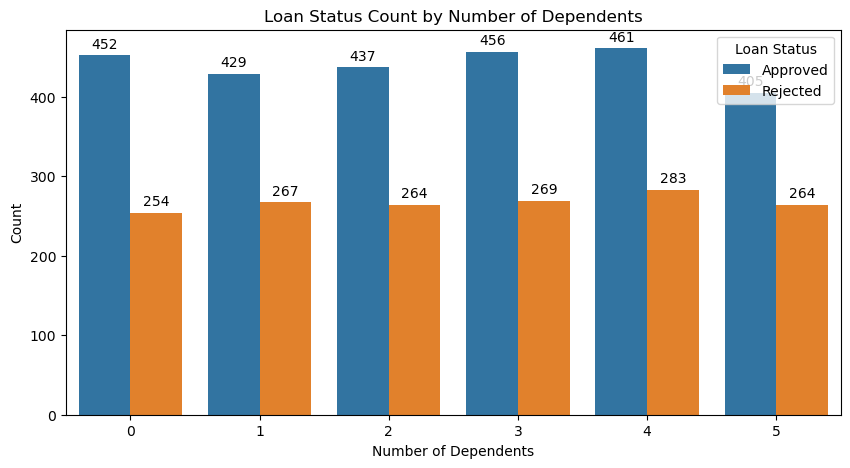

In [ ]:
# Calculate the total for each no_of_dependents
dependents_counts = df1.groupby(['no_of_dependents', 'loan_status']).size().reset_index(name='count')

# Set the size of the chart
plt.figure(figsize=(10, 5))

# Create a side-by-side bar chart
count_plot = sns.barplot(data=dependents_counts, x='no_of_dependents', y='count', hue='loan_status')

# Add numbers above the bars
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 3),  # Distance between the number and the bar
                        textcoords='offset points')

# Add title and labels
plt.title('Loan Status Count by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the chart
plt.legend(title='Loan Status', loc='upper right')
plt.show()


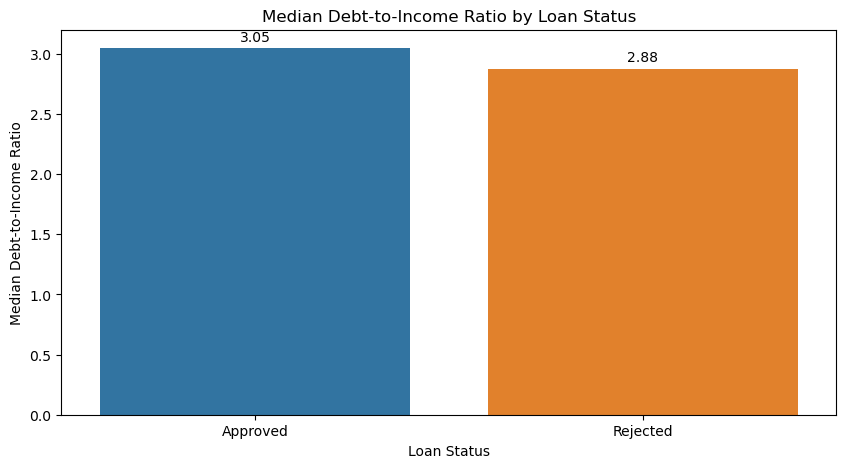

In [ ]:
# Calculate the median debt_to_income_ratio based on loan_status
median_debt_to_income_ratio = df1.groupby('loan_status')['debt_to_income_ratio'].median().reset_index()

# Set the size of the chart
plt.figure(figsize=(10, 5))

# Create a barplot for median debt_to_income_ratio
barplot = sns.barplot(data=median_debt_to_income_ratio, x='loan_status', y='debt_to_income_ratio')

# Add numbers above the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 3),  # Distance between the number and the bar
                     textcoords='offset points')

# Add title and labels
plt.title('Median Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Median Debt-to-Income Ratio')

# Display the chart
plt.show()


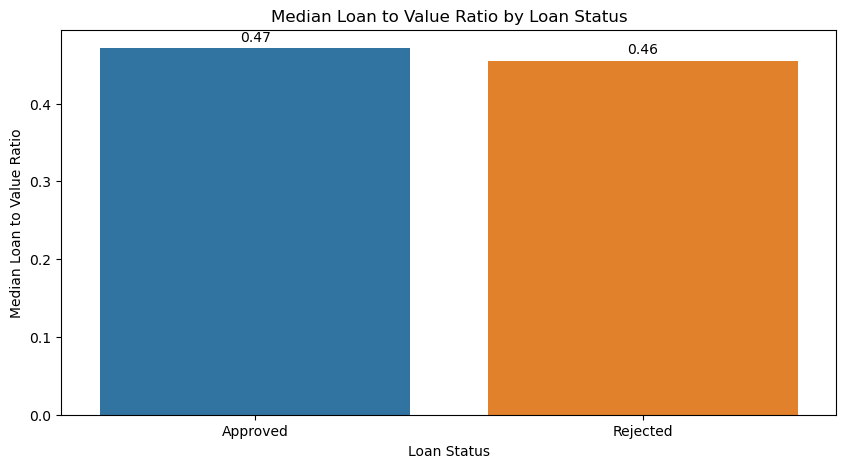

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median loan_to_value_ratio based on loan_status
median_loan_to_value_ratio = df1.groupby('loan_status')['loan_to_value_ratio'].median().reset_index()

# Set the size of the chart
plt.figure(figsize=(10, 5))

# Create a barplot for median loan_to_value_ratio
barplot = sns.barplot(data=median_loan_to_value_ratio, x='loan_status', y='loan_to_value_ratio')

# Add numbers above the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 3),  # Distance between the number and the bar
                     textcoords='offset points')

# Add title and labels
plt.title('Median Loan to Value Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Median Loan to Value Ratio')

# Display the chart
plt.show()


In [ ]:
# One-Hot Encoding for the 'education' column
df1 = pd.get_dummies(df1, columns=['education'], prefix='education')

# One-Hot Encoding for the 'self_employed' column
df1 = pd.get_dummies(df1, columns=['self_employed'], prefix='self_employed')

# Manual Label Encoding for the 'loan_status' column
df1['loan_status'] = df1['loan_status'].replace({'Rejected': 0, 'Approved': 1})

# Manual Label Encoding for the 'cibil_category' column
df1['cibil_category'] = df1['cibil_category'].replace({
    'Very Poor': 0,
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
})

# Check the results of the encoding
df1.head()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,loan_status,cibil_category,total_assets_value,debt_to_income_ratio,loan_to_value_ratio,dependents_to_income_ratio,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,1,2,9600000,29900000,12,778,1,4,50700000,3.114583,0.589744,2.083333e-07,1,0,1,0
1,2,0,4100000,12200000,8,417,0,0,17000000,2.975610,0.717647,0.000000e+00,0,1,0,1
2,3,3,9100000,29700000,20,506,0,0,57700000,3.263736,0.514731,3.296703e-07,1,0,1,0
3,4,3,8200000,30700000,8,467,0,0,52700000,3.743902,0.582543,3.658537e-07,1,0,1,0
4,5,5,9800000,24200000,20,382,0,0,55000000,2.469388,0.440000,5.102041e-07,0,1,0,1


### 3.6 Feature Selection

In [ ]:
# Remove the 'loan_id' column from df1
df1 = df1.drop(columns=['loan_id'])

# Display the results
df1.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,loan_status,cibil_category,total_assets_value,debt_to_income_ratio,loan_to_value_ratio,dependents_to_income_ratio,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,2,9600000,29900000,12,778,1,4,50700000,3.114583,0.589744,2.083333e-07,1,0,1,0
1,0,4100000,12200000,8,417,0,0,17000000,2.975610,0.717647,0.000000e+00,0,1,0,1
2,3,9100000,29700000,20,506,0,0,57700000,3.263736,0.514731,3.296703e-07,1,0,1,0
3,3,8200000,30700000,8,467,0,0,52700000,3.743902,0.582543,3.658537e-07,1,0,1,0
4,5,9800000,24200000,20,382,0,0,55000000,2.469388,0.440000,5.102041e-07,0,1,0,1


In [ ]:
# Move the 'loan_status' column to the last position
cols = [col for col in df1.columns if col != 'loan_status']  # Get all columns except 'loan_status'
df1 = df1[cols + ['loan_status']]  # Add 'loan_status' at the end

# Check the new column order
print(df1.columns)


Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'cibil_category', 'total_assets_value',
       'debt_to_income_ratio', 'loan_to_value_ratio',
       'dependents_to_income_ratio', 'education_Graduate',
       'education_Not Graduate', 'self_employed_No', 'self_employed_Yes',
       'loan_status'],
      dtype='object')


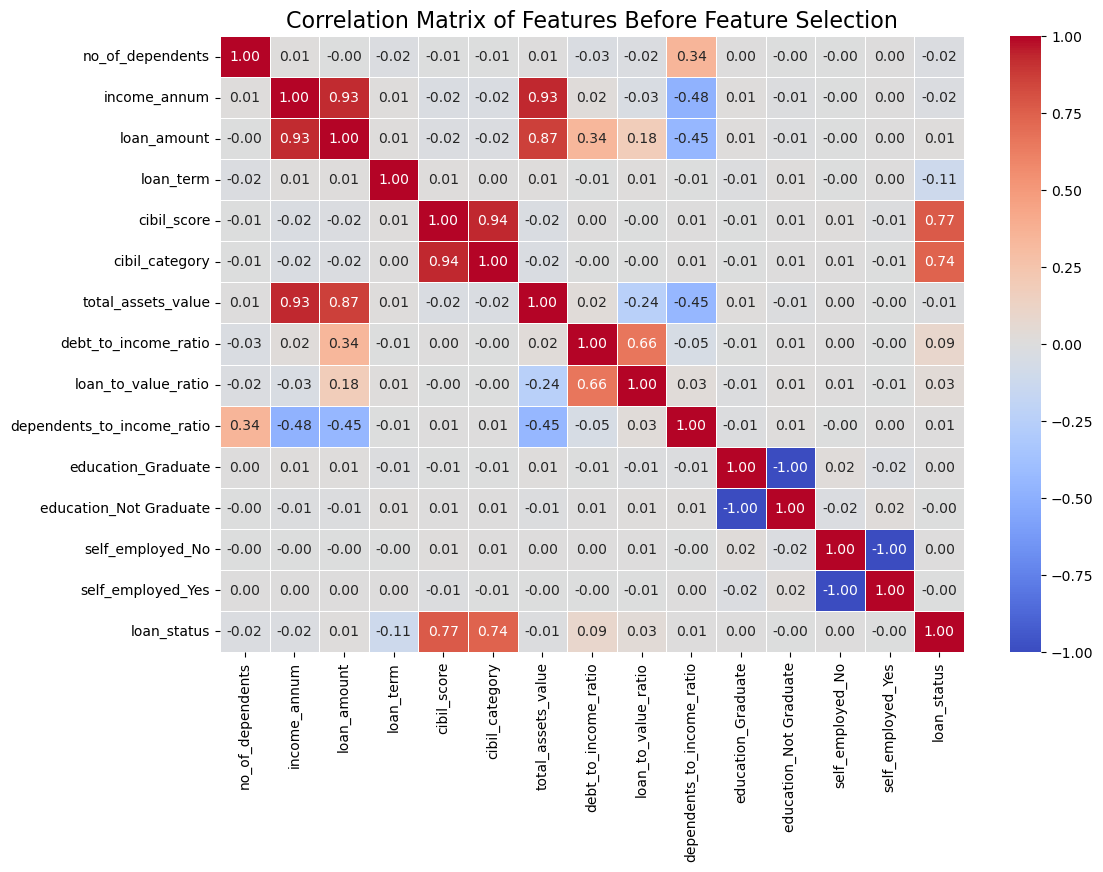

In [ ]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation between features with 3 decimal places
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Features Before Feature Selection', fontsize=16)

# Display the heatmap
plt.show()


In [ ]:
# Columns to be deleted
columns_to_drop = ['education_Not Graduate', 'self_employed_No', 'loan_amount', 'cibil_category', 'total_assets_value']

# Drop the columns
df1.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after the deletion
print(df1.head())


   no_of_dependents  income_annum  loan_term  cibil_score  \
0                 2       9600000         12          778   
1                 0       4100000          8          417   
2                 3       9100000         20          506   
3                 3       8200000          8          467   
4                 5       9800000         20          382   

   debt_to_income_ratio  loan_to_value_ratio  dependents_to_income_ratio  \
0              3.114583             0.589744                2.083333e-07   
1              2.975610             0.717647                0.000000e+00   
2              3.263736             0.514731                3.296703e-07   
3              3.743902             0.582543                3.658537e-07   
4              2.469388             0.440000                5.102041e-07   

   education_Graduate  self_employed_Yes  loan_status  
0                   1                  0            1  
1                   0                  1            0  
2       

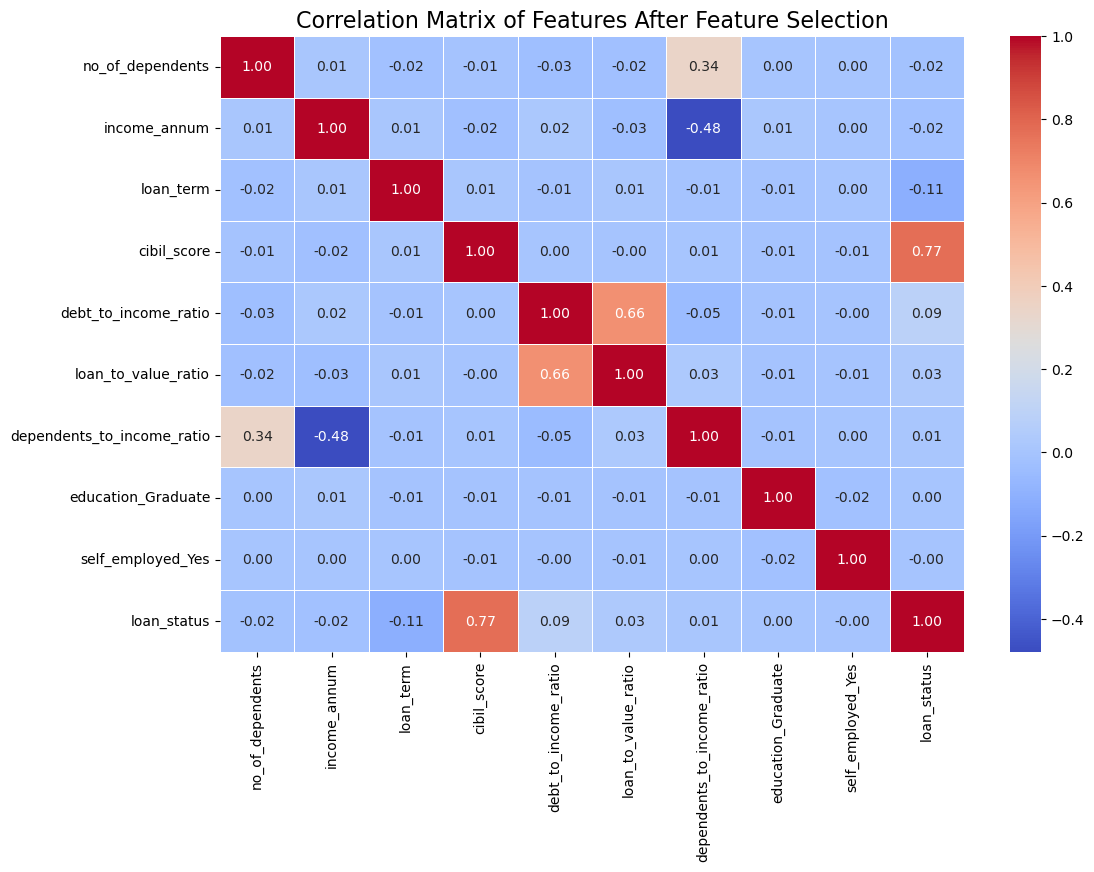

In [ ]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation between features with 3 decimal places
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Features After Feature Selection', fontsize=16)

# Display the heatmap
plt.show()


### 3.7 Standarization

In [ ]:
from sklearn.preprocessing import RobustScaler

# Memisahkan fitur numerik yang perlu di-scaling
features_to_scale = ['no_of_dependents', 'income_annum', 'loan_term',
                     'debt_to_income_ratio', 'loan_to_value_ratio']

# Membuat objek RobustScaler
scaler = RobustScaler()

# Melakukan scaling pada fitur-fitur yang dipilih
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

# Menampilkan DataFrame setelah scaling
print("\nDataFrame df1 setelah scaling:\n", df1)



DataFrame df1 setelah scaling:
       no_of_dependents  income_annum  loan_term  cibil_score  \
0            -0.333333      0.937500        0.2          778   
1            -1.000000     -0.208333       -0.2          417   
2             0.000000      0.833333        1.0          506   
3             0.000000      0.645833       -0.2          467   
4             0.666667      0.979167        1.0          382   
...                ...           ...        ...          ...   
4264          0.666667     -0.854167        0.2          317   
4265         -1.000000     -0.375000        1.0          559   
4266         -0.333333      0.291667        0.8          457   
4267         -0.666667     -0.208333       -0.2          780   
4268         -0.666667      0.854167        0.0          607   

      debt_to_income_ratio  loan_to_value_ratio  dependents_to_income_ratio  \
0                 0.110887             0.674198                2.083333e-07   
1                -0.023603             1

## 4. Machine Learning


### 4.1 Check Target Distribution

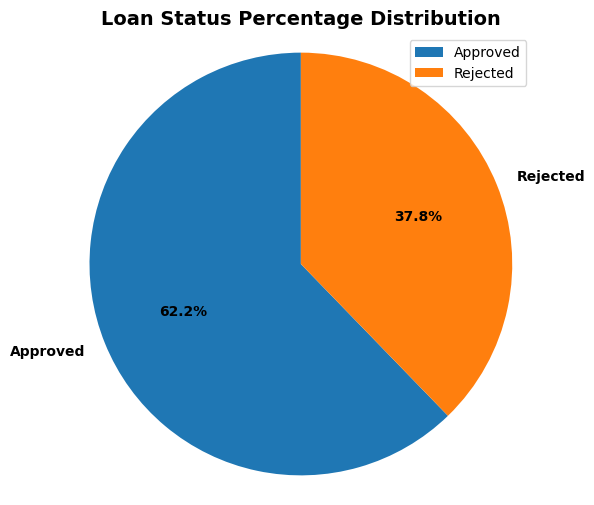

In [ ]:
# Calculate the count for each loan_status
loan_status_counts = df['loan_status'].value_counts()

# Calculate the percentage
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100

# Set the figure size (smaller)
plt.figure(figsize=(6, 6))

# Create a pie chart with blue and orange colors
plt.pie(
    loan_status_percentage,
    labels=loan_status_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e'],  # Softer blue (Approved) and orange (Rejected)
    textprops={'fontsize': 10, 'fontweight': 'bold'}  # Smaller and bold font size
)

# Add a title
plt.title('Loan Status Percentage Distribution', fontsize=14, fontweight='bold')

# Add a legend with specific labels
plt.legend(['Approved', 'Rejected'], loc='upper right')

# Display the chart
plt.axis('equal')  # Keep the pie circular
plt.show()


### 4.2 Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Separating features and target
X = df1.drop(columns=['loan_status'])
y = df1['loan_status']

# Direct split: train (60%), validation (20%), test (20%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)  # 60% train, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)  # 20% valid, 20% test

# Displaying the shape of each set
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (2544, 9)
X_val shape: (848, 9)
X_test shape: (849, 9)


### 4.3 Modeling

### 4.3.1. Baseline Model (Dummy Classifier)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score

# Inisialisasi DummyClassifier dengan strategi stratified
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train, y_train)
baseline_model

DummyClassifier(strategy='stratified')

In [ ]:
# Predictions using the baseline model DummyClassifier on the training data
y_train_pred_baseline = baseline_model.predict(X_train)

# Probability predictions on the training data (for AUC-ROC)
y_train_pred_proba_baseline = baseline_model.predict_proba(X_train)[:, 1]

# Evaluating the baseline model on the training data
print("Classification Report of Baseline Model (DummyClassifier) on training data:\n", classification_report(y_train, y_train_pred_baseline, zero_division=0))
print("F1-Score of Baseline Model (DummyClassifier) on training data:", f1_score(y_train, y_train_pred_baseline, zero_division=0))
print("Precision of Baseline Model (DummyClassifier) on training data:", precision_score(y_train, y_train_pred_baseline, zero_division=0))
print("Recall of Baseline Model (DummyClassifier) on training data:", recall_score(y_train, y_train_pred_baseline, zero_division=0))
print("AUC-ROC of Baseline Model (DummyClassifier) on training data:", roc_auc_score(y_train, y_train_pred_proba_baseline))  # Using probabilities


Classification Report of Baseline Model (DummyClassifier) on training data:
               precision    recall  f1-score   support

           0       0.38      0.36      0.37       960
           1       0.62      0.64      0.63      1584

    accuracy                           0.54      2544
   macro avg       0.50      0.50      0.50      2544
weighted avg       0.53      0.54      0.53      2544

F1-Score of Baseline Model (DummyClassifier) on training data: 0.6339646072648246
Precision of Baseline Model (DummyClassifier) on training data: 0.6237018937080024
Recall of Baseline Model (DummyClassifier) on training data: 0.6445707070707071
AUC-ROC of Baseline Model (DummyClassifier) on training data: 0.5145044191919192


### Model Evaluation (DummyClassifier)

In [ ]:
# Predictions using the baseline model DummyClassifier on the validation data
y_val_pred_baseline = baseline_model.predict(X_val)

# Probability predictions on the validation data (for AUC-ROC)
y_val_pred_proba_baseline = baseline_model.predict_proba(X_val)[:, 1]

# Evaluating the baseline model on the validation data
print("Classification Report of Baseline Model (DummyClassifier) on validation data:\n", classification_report(y_val, y_val_pred_baseline, zero_division=0))
print("F1-Score of Baseline Model (DummyClassifier) on validation data:", f1_score(y_val, y_val_pred_baseline, zero_division=0))
print("Precision of Baseline Model (DummyClassifier) on validation data:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall of Baseline Model (DummyClassifier) on validation data:", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("AUC-ROC of Baseline Model (DummyClassifier) on validation data:", roc_auc_score(y_val, y_val_pred_proba_baseline))  # Using probabilities


Classification Report of Baseline Model (DummyClassifier) on validation data:
               precision    recall  f1-score   support

           0       0.39      0.38      0.38       320
           1       0.63      0.64      0.64       528

    accuracy                           0.54       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.54      0.54      0.54       848

F1-Score of Baseline Model (DummyClassifier) on validation data: 0.6367041198501873
Precision of Baseline Model (DummyClassifier) on validation data: 0.6296296296296297
Recall of Baseline Model (DummyClassifier) on validation data: 0.6439393939393939
AUC-ROC of Baseline Model (DummyClassifier) on validation data: 0.5071969696969697


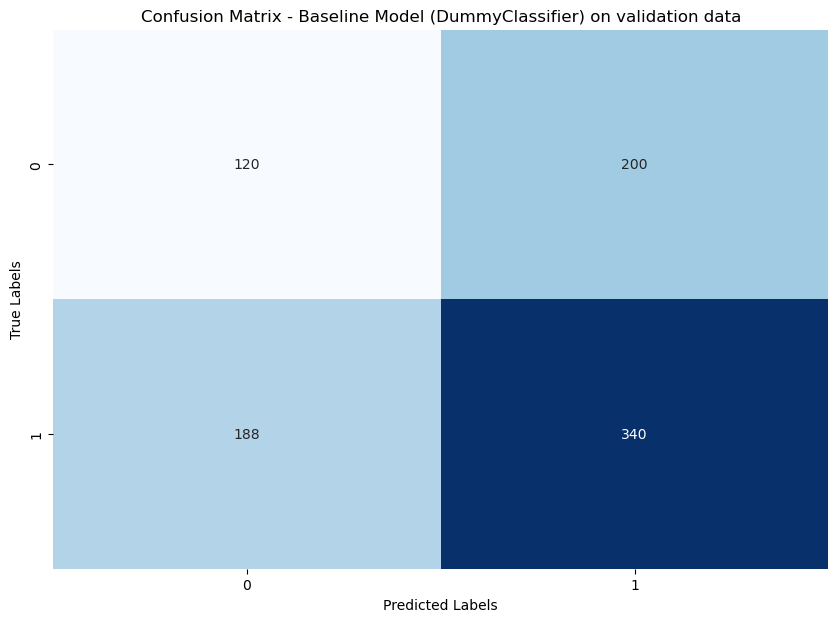

In [ ]:
# Confusion Matrix
cm_baseline = confusion_matrix(y_val, y_val_pred_baseline)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Baseline Model (DummyClassifier) on validation data')
plt.show()


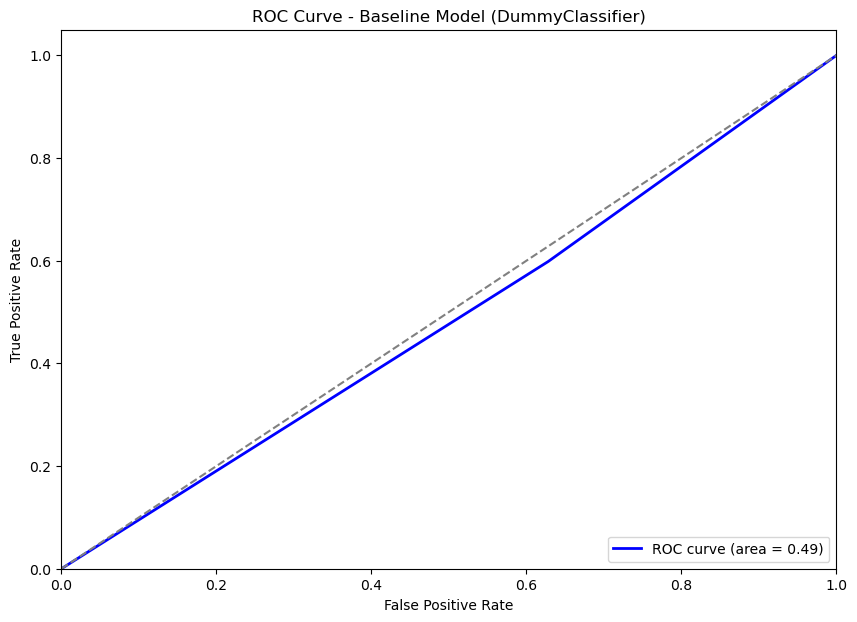

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the baseline model
y_val_prob_baseline = baseline_model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_baseline)
roc_auc_baseline_val = auc(fpr, tpr)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_baseline_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model (DummyClassifier)')
plt.legend(loc="lower right")
plt.show()


##  4.3.2 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
logreg


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Predictions using the Logistic Regression model on the training data
y_train_pred_logreg = logreg.predict(X_train)

# Probability predictions on the training data (for AUC-ROC)
y_train_pred_proba_logreg = logreg.predict_proba(X_train)[:, 1]

# Evaluate the Logistic Regression model on the training data
print("Classification Report for Logistic Regression on the training data:\n", classification_report(y_train, y_train_pred_logreg))
print("F1-Score for Logistic Regression on the training data:", f1_score(y_train, y_train_pred_logreg))
print("Precision for Logistic Regression model on the training data:", precision_score(y_train, y_train_pred_logreg))
print("Recall for Logistic Regression model on the training data:", recall_score(y_train, y_train_pred_logreg))
print("AUC-ROC for Logistic Regression on the training data:", roc_auc_score(y_train, y_train_pred_proba_logreg))  # Using probabilities


Classification Report for Logistic Regression on the training data:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       960
           1       0.95      0.91      0.93      1584

    accuracy                           0.91      2544
   macro avg       0.90      0.92      0.91      2544
weighted avg       0.92      0.91      0.91      2544

F1-Score for Logistic Regression on the training data: 0.9290573372206026
Precision for Logistic Regression model on the training data: 0.9540918163672655
Recall for Logistic Regression model on the training data: 0.9053030303030303
AUC-ROC for Logistic Regression on the training data: 0.9690044981060606


### Model Evaluation (Logistic Regression)

In [ ]:
# Predictions using the Logistic Regression model on the validation data
y_val_pred_logreg = logreg.predict(X_val)

# Probability predictions on the validation data (for AUC-ROC)
y_val_pred_proba_logreg = logreg.predict_proba(X_val)[:, 1]

# Evaluate the Logistic Regression model on the validation data
print("Classification Report for Logistic Regression on the validation data:\n", classification_report(y_val, y_val_pred_logreg))
print("F1-Score for Logistic Regression on the validation data:", f1_score(y_val, y_val_pred_logreg))
print("Precision for Logistic Regression model on the validation data:", precision_score(y_val, y_val_pred_logreg))
print("Recall for Logistic Regression model on the validation data:", recall_score(y_val, y_val_pred_logreg))
print("AUC-ROC for Logistic Regression on the validation data:", roc_auc_score(y_val, y_val_pred_proba_logreg))  # Using probabilities


Classification Report for Logistic Regression on the validation data:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       320
           1       0.96      0.93      0.94       528

    accuracy                           0.93       848
   macro avg       0.92      0.93      0.93       848
weighted avg       0.93      0.93      0.93       848

F1-Score for Logistic Regression on the validation data: 0.9424184261036469
Precision for Logistic Regression model on the validation data: 0.9552529182879378
Recall for Logistic Regression model on the validation data: 0.9299242424242424
AUC-ROC for Logistic Regression on the validation data: 0.9748816287878788


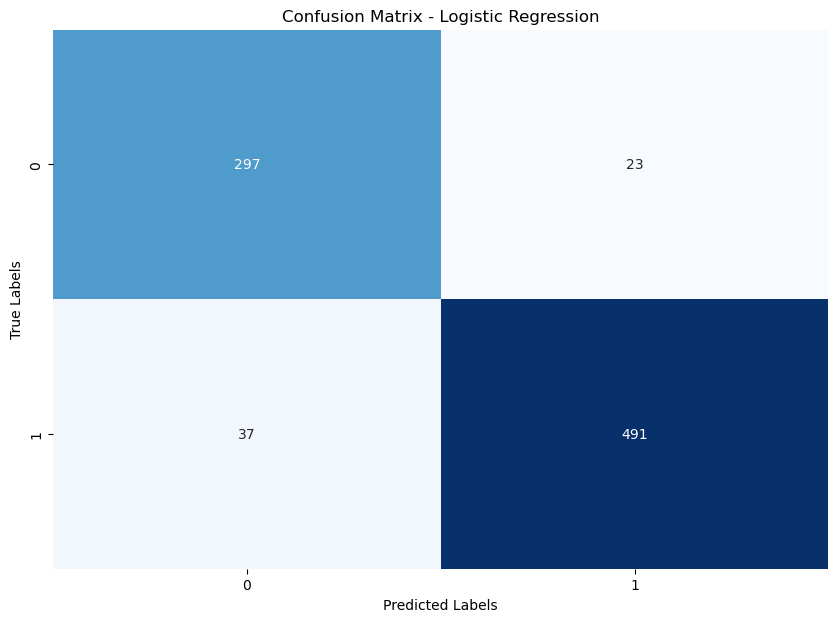

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Confusion Matrix
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


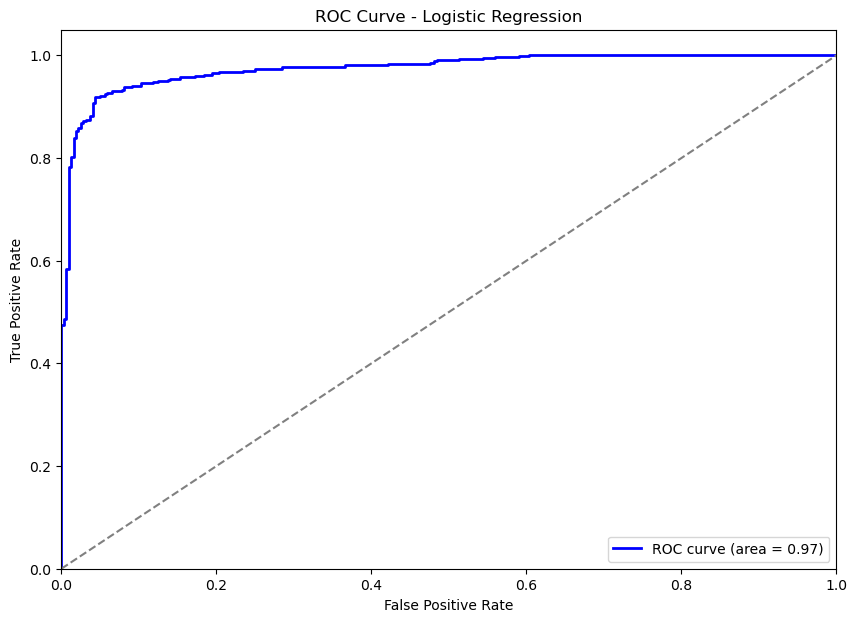

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi untuk kurva ROC
y_val_prob_logreg = logreg.predict_proba(X_val)[:, 1]

# Menghitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_logreg)
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk referensi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### 4.3.3. Model SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Create and train the SVM model with class_weight
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)  # class_weight='balanced' to handle class imbalance
svm_model.fit(X_train, y_train)
svm_model


SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             f1_score, precision_score, recall_score)

# Predict using the SVM model on the training data
y_train_pred_svm = svm_model.predict(X_train)

# Predict probabilities on the training data (for AUC-ROC)
y_train_pred_proba_svm = svm_model.predict_proba(X_train)[:, 1]

# Evaluate the SVM model on the training data
print("Classification Report SVM on training data:\n", classification_report(y_train, y_train_pred_svm))
print("F1-Score SVM on training data:", f1_score(y_train, y_train_pred_svm))
print("Precision SVM on training data:", precision_score(y_train, y_train_pred_svm))
print("Recall SVM on training data:", recall_score(y_train, y_train_pred_svm))
print("AUC-ROC SVM on training data:", roc_auc_score(y_train, y_train_pred_proba_svm))  # Using probabilities


Classification Report SVM on training data:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       960
           1       1.00      0.88      0.94      1584

    accuracy                           0.92      2544
   macro avg       0.92      0.94      0.92      2544
weighted avg       0.94      0.92      0.93      2544

F1-Score SVM on training data: 0.9360990297758447
Precision SVM on training data: 0.995729537366548
Recall SVM on training data: 0.8832070707070707
AUC-ROC SVM on training data: 0.9571910511363636


### Model Evaluation (SVM)

In [ ]:
# Predict using the model on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Predict probabilities on the validation set (for AUC-ROC)
y_val_pred_proba_svm = svm_model.predict_proba(X_val)[:, 1]

# Evaluate the SVM model on the validation data
print("Classification Report SVM on validation data:\n", classification_report(y_val, y_val_pred_svm))
print("F1-Score SVM on validation data:", f1_score(y_val, y_val_pred_svm))
print("Precision SVM on validation data:", precision_score(y_val, y_val_pred_svm))
print("Recall SVM on validation data:", recall_score(y_val, y_val_pred_svm))
print("AUC-ROC SVM on validation data:", roc_auc_score(y_val, y_val_pred_proba_svm))  # Using probabilities


Classification Report SVM on validation data:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       320
           1       0.99      0.90      0.94       528

    accuracy                           0.93       848
   macro avg       0.93      0.95      0.93       848
weighted avg       0.94      0.93      0.93       848

F1-Score SVM on validation data: 0.9443339960238569
Precision SVM on validation data: 0.9937238493723849
Recall SVM on validation data: 0.8996212121212122
AUC-ROC SVM on validation data: 0.9676077178030301


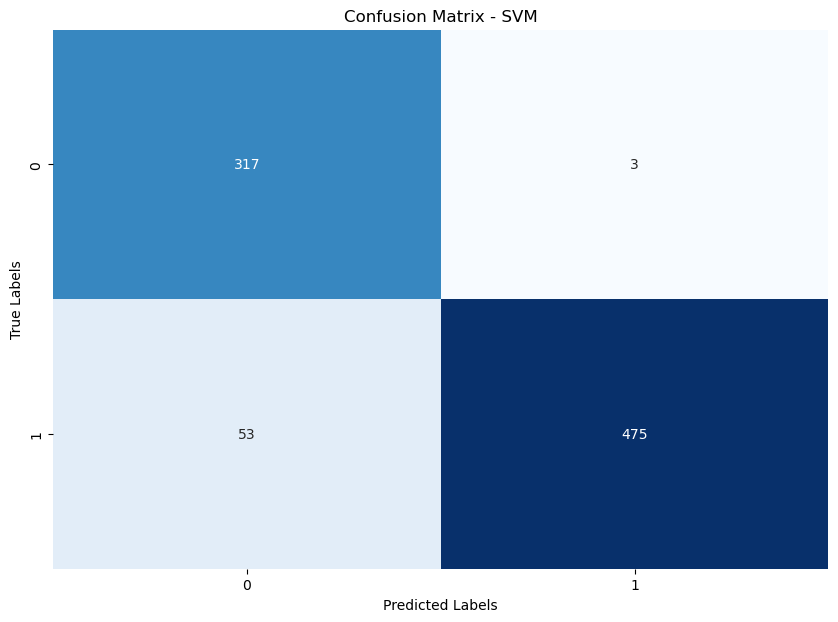

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Confusion Matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


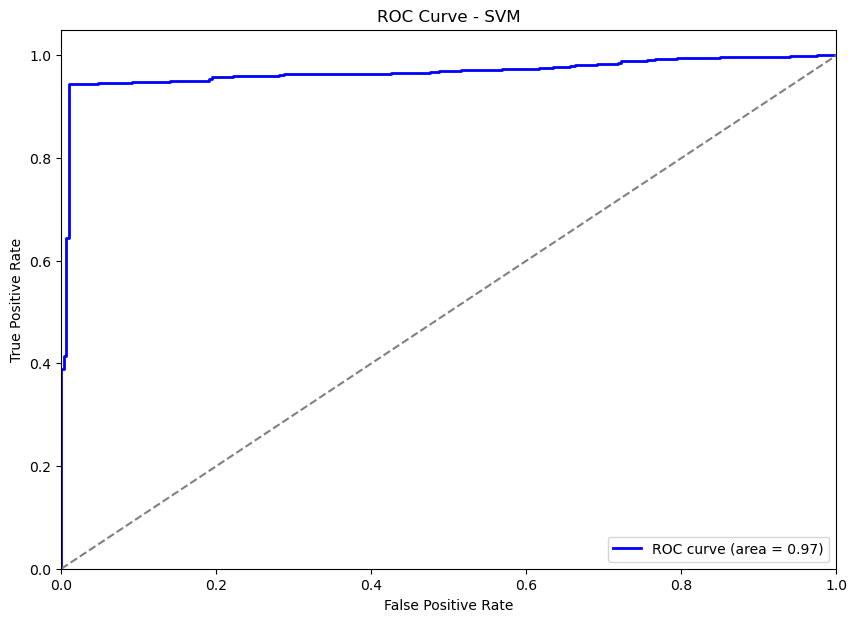

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve
y_val_prob_svm = svm_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Visualize ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


### 4.3.4 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)  # class_weight='balanced' to handle class imbalance
rf_model.fit(X_train, y_train)
rf_model


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Predict classes on training data
y_train_pred_rf = rf_model.predict(X_train)

# Predict probabilities on training data (probability for class 1)
y_train_pred_proba_rf = rf_model.predict_proba(X_train)[:, 1]

# Evaluate the Random Forest model on training data
print("Classification Report for Random Forest on training data:\n", classification_report(y_train, y_train_pred_rf))
print("F1-Score for Random Forest on training data:", f1_score(y_train, y_train_pred_rf))
print("Precision for Random Forest model on training data:", precision_score(y_train, y_train_pred_rf))
print("Recall for Random Forest model on training data:", recall_score(y_train, y_train_pred_rf))
print("AUC-ROC for Random Forest on training data:", roc_auc_score(y_train, y_train_pred_proba_rf))  # Using probabilities


Classification Report for Random Forest on training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00      1584

    accuracy                           1.00      2544
   macro avg       1.00      1.00      1.00      2544
weighted avg       1.00      1.00      1.00      2544

F1-Score for Random Forest on training data: 1.0
Precision for Random Forest model on training data: 1.0
Recall for Random Forest model on training data: 1.0
AUC-ROC for Random Forest on training data: 1.0


### Model Evaluation  (Random Forest)

In [ ]:
# Predict the model on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Predict probabilities on the validation set (for AUC-ROC)
y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate the Random Forest model on the validation data
print("Classification Report for Random Forest on validation data:\n", classification_report(y_val, y_val_pred_rf))
print("F1-Score for Random Forest on validation data:", f1_score(y_val, y_val_pred_rf))
print("Precision for Random Forest model on validation data:", precision_score(y_val, y_val_pred_rf))
print("Recall for Random Forest model on validation data:", recall_score(y_val, y_val_pred_rf))
print("AUC-ROC for Random Forest on validation data:", roc_auc_score(y_val, y_val_pred_proba_rf))  # Using probabilities


Classification Report for Random Forest on validation data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       0.99      0.99      0.99       528

    accuracy                           0.99       848
   macro avg       0.99      0.99      0.99       848
weighted avg       0.99      0.99      0.99       848

F1-Score for Random Forest on validation data: 0.9943181818181818
Precision for Random Forest model on validation data: 0.9943181818181818
Recall for Random Forest model on validation data: 0.9943181818181818
AUC-ROC for Random Forest on validation data: 0.9990027225378788


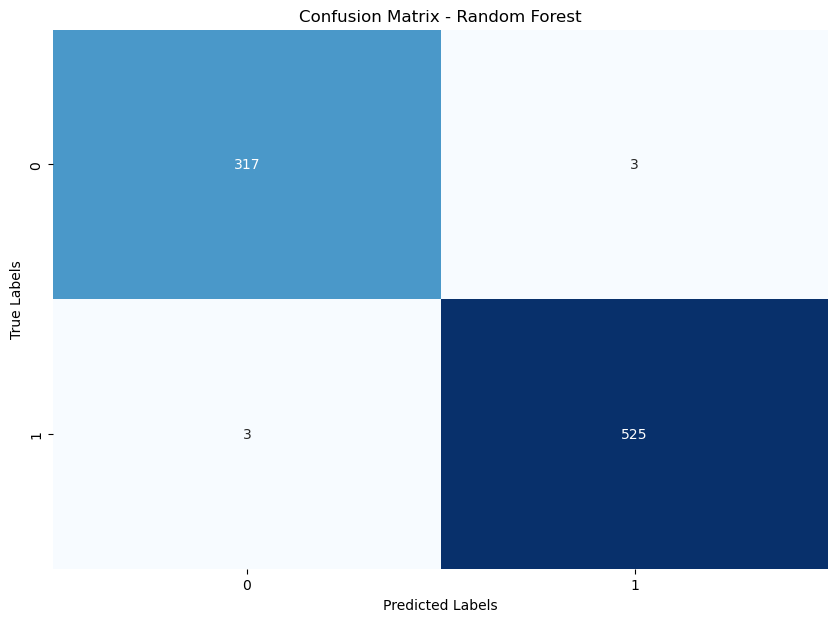

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_rf_val = confusion_matrix(y_val, y_val_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


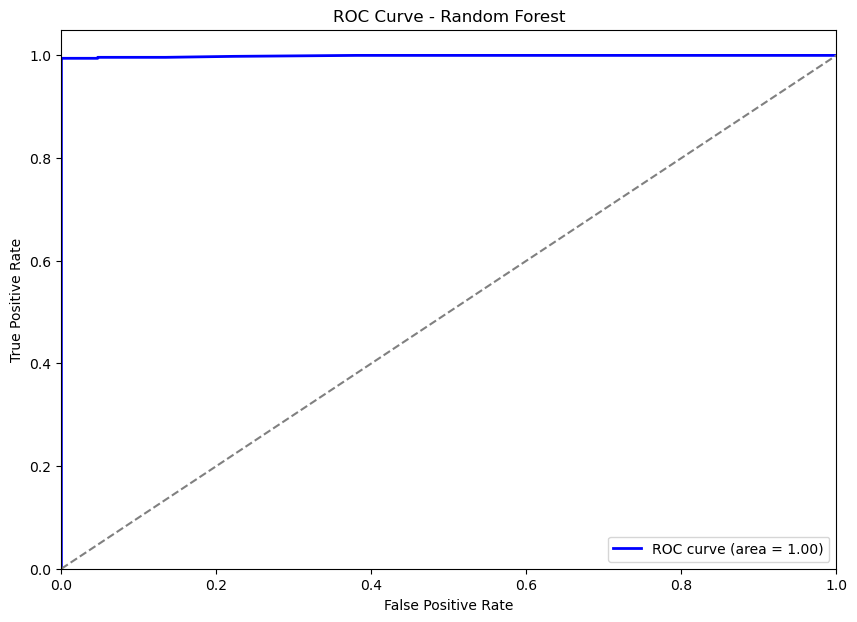

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve
y_val_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_rf_val = auc(fpr_rf, tpr_rf)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


### 4.3.5 Model XGBoost Classifier


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score

# Create and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the training data
y_train_pred_xgb = xgb_model.predict(X_train)

# Predict probabilities on the training data (for AUC-ROC)
y_train_pred_proba_xgb = xgb_model.predict_proba(X_train)[:, 1]

# Evaluate the XGBoost model on the training data
print("Classification Report XGBoost on training data:\n", classification_report(y_train, y_train_pred_xgb))
print("F1-Score XGBoost on training data:", f1_score(y_train, y_train_pred_xgb))
print("Precision XGBoost on training data:", precision_score(y_train, y_train_pred_xgb))
print("Recall XGBoost on training data:", recall_score(y_train, y_train_pred_xgb))
print("AUC-ROC XGBoost on training data:", roc_auc_score(y_train, y_train_pred_proba_xgb))  # Using probabilities

Classification Report XGBoost on training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00      1584

    accuracy                           1.00      2544
   macro avg       1.00      1.00      1.00      2544
weighted avg       1.00      1.00      1.00      2544

F1-Score XGBoost on training data: 1.0
Precision XGBoost on training data: 1.0
Recall XGBoost on training data: 1.0
AUC-ROC XGBoost on training data: 1.0


### Model Evaluation (XGboost)

In [ ]:
# Evaluate the model on the validation data
# Predict on the validation data
y_val_pred_xgb = xgb_model.predict(X_val)

# Predict probabilities on the validation data (for AUC-ROC)
y_val_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate the XGBoost model on the validation data
print("Classification Report XGBoost on validation data:\n", classification_report(y_val, y_val_pred_xgb))
print("F1-Score XGBoost on validation data:", f1_score(y_val, y_val_pred_xgb))
print("Precision XGBoost on validation data:", precision_score(y_val, y_val_pred_xgb))
print("Recall XGBoost on validation data:", recall_score(y_val, y_val_pred_xgb))
print("AUC-ROC XGBoost on validation data:", roc_auc_score(y_val, y_val_pred_proba_xgb))  # Using probabilities


Classification Report XGBoost on validation data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       0.99      0.99      0.99       528

    accuracy                           0.99       848
   macro avg       0.99      0.99      0.99       848
weighted avg       0.99      0.99      0.99       848

F1-Score XGBoost on validation data: 0.9933649289099525
Precision XGBoost on validation data: 0.9943074003795066
Recall XGBoost on validation data: 0.9924242424242424
AUC-ROC XGBoost on validation data: 0.9998934659090909


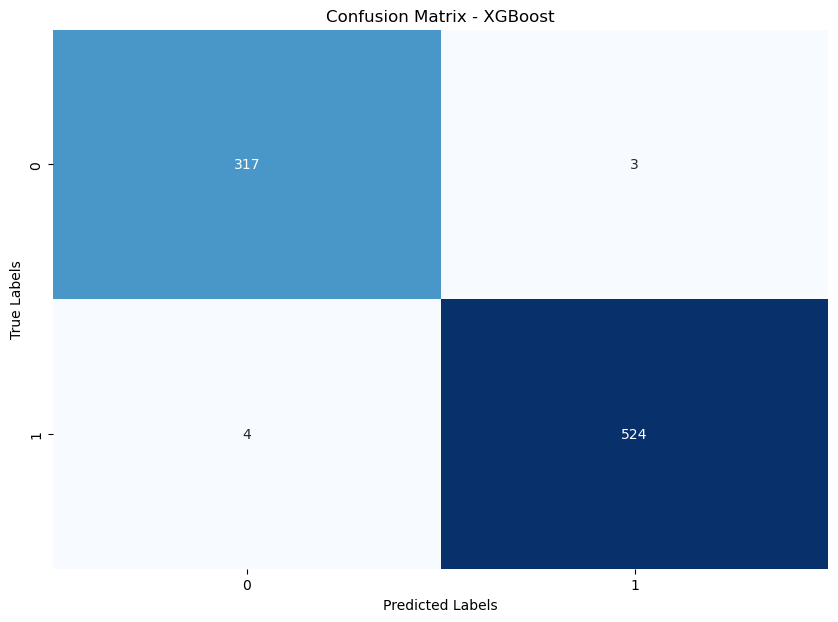

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)

# Visualize Confusion Matrix for XGBoost
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()


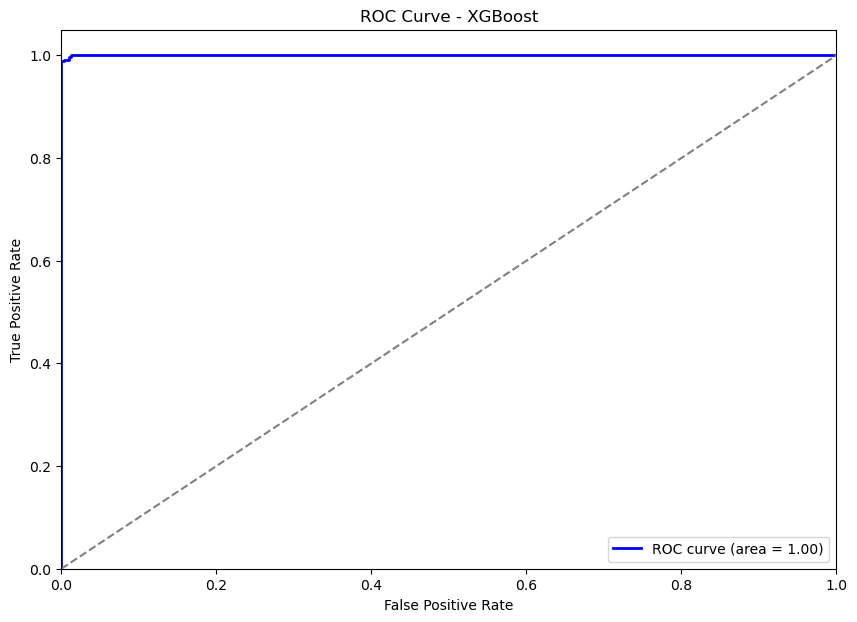

In [ ]:
# Calculate predicted probabilities for ROC curve
y_val_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_val_prob_xgb)
roc_auc_xgb_val = auc(fpr_xgb, tpr_xgb)

# Visualize ROC curve for XGBoost
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


### 4.4 Analysis and selection of the best model

In [ ]:
import pandas as pd

# Performance metrics data
data_train = {
    'Metric': ['F1-Score', 'Precision', 'Recall', 'AUC-ROC'],
    'Dummy Classifier': [
        f1_score(y_train, y_train_pred_baseline, zero_division=0),
        precision_score(y_train, y_train_pred_baseline, zero_division=0),
        recall_score(y_train, y_train_pred_baseline, zero_division=0),
        roc_auc_score(y_train, y_train_pred_proba_baseline)
    ],
    'Logistic Regression': [
        f1_score(y_train, y_train_pred_logreg),
        precision_score(y_train, y_train_pred_logreg),
        recall_score(y_train, y_train_pred_logreg),
        roc_auc_score(y_train, y_train_pred_proba_logreg)
    ],
    'SVM': [
        f1_score(y_train, y_train_pred_svm),
        precision_score(y_train, y_train_pred_svm),
        recall_score(y_train, y_train_pred_svm),
        roc_auc_score(y_train, y_train_pred_proba_svm)
    ],
    'Random Forest': [
        f1_score(y_train, y_train_pred_rf),
        precision_score(y_train, y_train_pred_rf),
        recall_score(y_train, y_train_pred_rf),
        roc_auc_score(y_train, y_train_pred_proba_rf)
    ],
    'XGBoost': [
        f1_score(y_train, y_train_pred_xgb),
        precision_score(y_train, y_train_pred_xgb),
        recall_score(y_train, y_train_pred_xgb),
        roc_auc_score(y_train, y_train_pred_proba_xgb)
    ]
}

# Creating DataFrame
df_metrics = pd.DataFrame(data_train)

# Displaying the table
df_metrics


,Metric,Dummy Classifier,Logistic Regression,SVM,Random Forest,XGBoost
0,F1-Score,0.633965,0.929057,0.936099,1.0,1.0
1,Precision,0.623702,0.954092,0.995730,1.0,1.0
2,Recall,0.644571,0.905303,0.883207,1.0,1.0
3,AUC-ROC,0.514504,0.969004,0.957191,1.0,1.0


In [ ]:
import pandas as pd

# Performance metrics data
data_val = {
    'Metric': ['F1-Score', 'Precision', 'Recall', 'AUC-ROC'],
    'Dummy Classifier': [
        f1_score(y_val, y_val_pred_baseline, zero_division=0),
        precision_score(y_val, y_val_pred_baseline, zero_division=0),
        recall_score(y_val, y_val_pred_baseline, zero_division=0),
        roc_auc_score(y_val, y_val_pred_proba_baseline)
    ],
    'Logistic Regression': [
        f1_score(y_val, y_val_pred_logreg),
        precision_score(y_val, y_val_pred_logreg),
        recall_score(y_val, y_val_pred_logreg),
        roc_auc_score(y_val, y_val_pred_proba_logreg)
    ],
    'SVM': [
        f1_score(y_val, y_val_pred_svm),
        precision_score(y_val, y_val_pred_svm),
        recall_score(y_val, y_val_pred_svm),
        roc_auc_score(y_val, y_val_pred_proba_svm)
    ],
    'Random Forest': [
        f1_score(y_val, y_val_pred_rf),
        precision_score(y_val, y_val_pred_rf),
        recall_score(y_val, y_val_pred_rf),
        roc_auc_score(y_val, y_val_pred_proba_rf)
    ],
    'XGBoost': [
        f1_score(y_val, y_val_pred_xgb),
        precision_score(y_val, y_val_pred_xgb),
        recall_score(y_val, y_val_pred_xgb),
        roc_auc_score(y_val, y_val_pred_proba_xgb)
    ]
}

# Creating DataFrame
df_metrics_val = pd.DataFrame(data_val)

# Displaying the table
df_metrics_val


,Metric,Dummy Classifier,Logistic Regression,SVM,Random Forest,XGBoost
0,F1-Score,0.636704,0.942418,0.944334,0.994318,0.993365
1,Precision,0.629630,0.955253,0.993724,0.994318,0.994307
2,Recall,0.643939,0.929924,0.899621,0.994318,0.992424
3,AUC-ROC,0.507197,0.974882,0.967608,0.999003,0.999893


The Random Forest model demonstrated the best performance across all metrics, particularly the F1-Score, which was very high on both the Training and Validation data, affirming its ability to predict loan status accurately.


### 4.5 Testing data on the best model (Random Forest)

In [ ]:
# Predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Predict probabilities on the test set (for AUC-ROC)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model on the test data
print("Classification Report for Random Forest on the test data:\n", classification_report(y_test, y_test_pred_rf))
print("Accuracy of Random Forest on the test data:", accuracy_score(y_test, y_test_pred_rf))
print("AUC-ROC for Random Forest on the test data:", roc_auc_score(y_test, y_test_pred_proba_rf))  # Using probabilities
print("F1-Score for Random Forest on the test data:", f1_score(y_test, y_test_pred_rf))
print("Precision of Random Forest on the test data:", precision_score(y_test, y_test_pred_rf))
print("Recall of Random Forest on the test data:", recall_score(y_test, y_test_pred_rf))


Classification Report for Random Forest on the test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       528

    accuracy                           1.00       849
   macro avg       1.00      1.00      1.00       849
weighted avg       1.00      1.00      1.00       849

Accuracy of Random Forest on the test data: 1.0
AUC-ROC for Random Forest on the test data: 1.0
F1-Score for Random Forest on the test data: 1.0
Precision of Random Forest on the test data: 1.0
Recall of Random Forest on the test data: 1.0


The Random Forest model with the CIBIL Score feature achieved perfect scores in all metrics (F1-Score, Precision, Recall, ROC AUC) of 1.0 on the test data, indicating very accurate predictive ability.


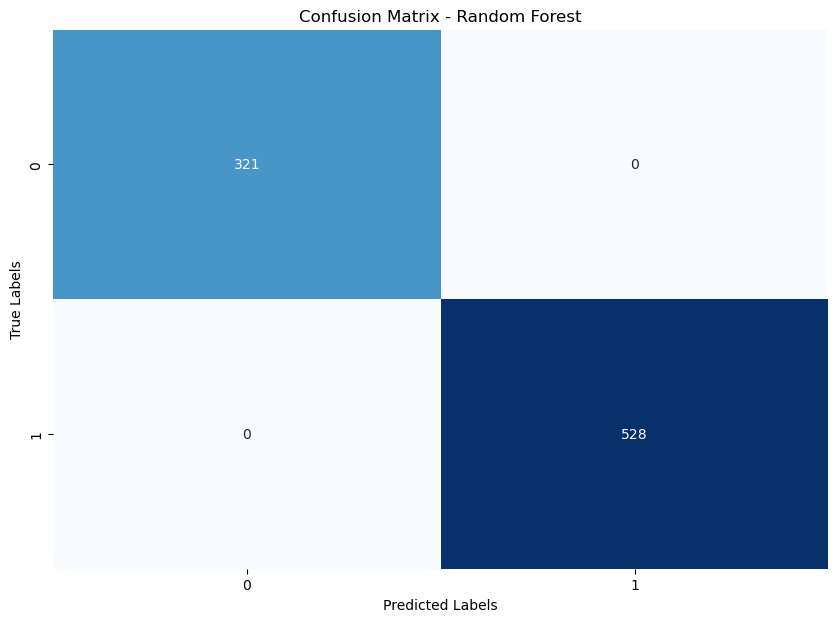

In [ ]:
# Calculate confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Visualize confusion matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


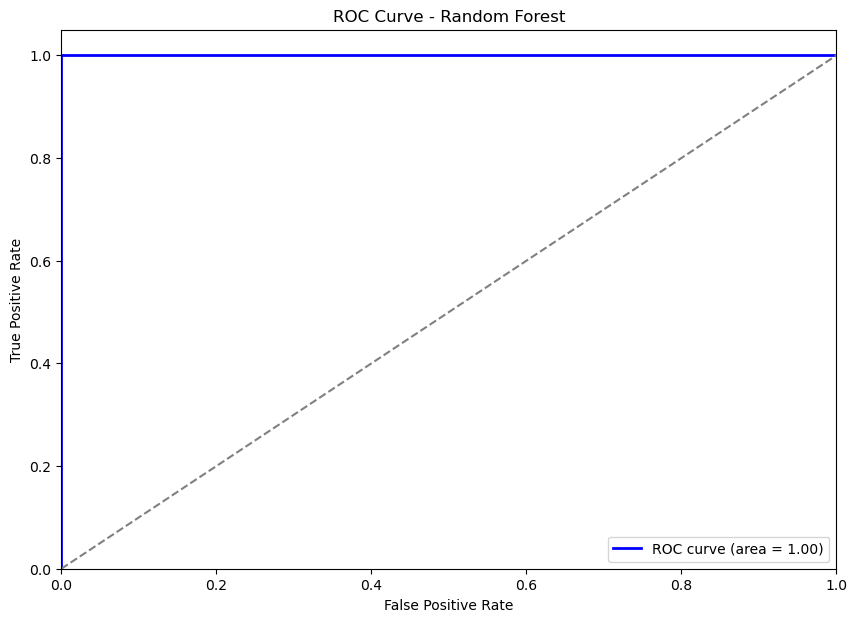

AUC-ROC Random Forest on test data: 1.00


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve from the Random Forest model
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Display the AUC value
print(f"AUC-ROC Random Forest on test data: {roc_auc_rf:.2f}")


### 4.6 Feature Importance (Random Forest)

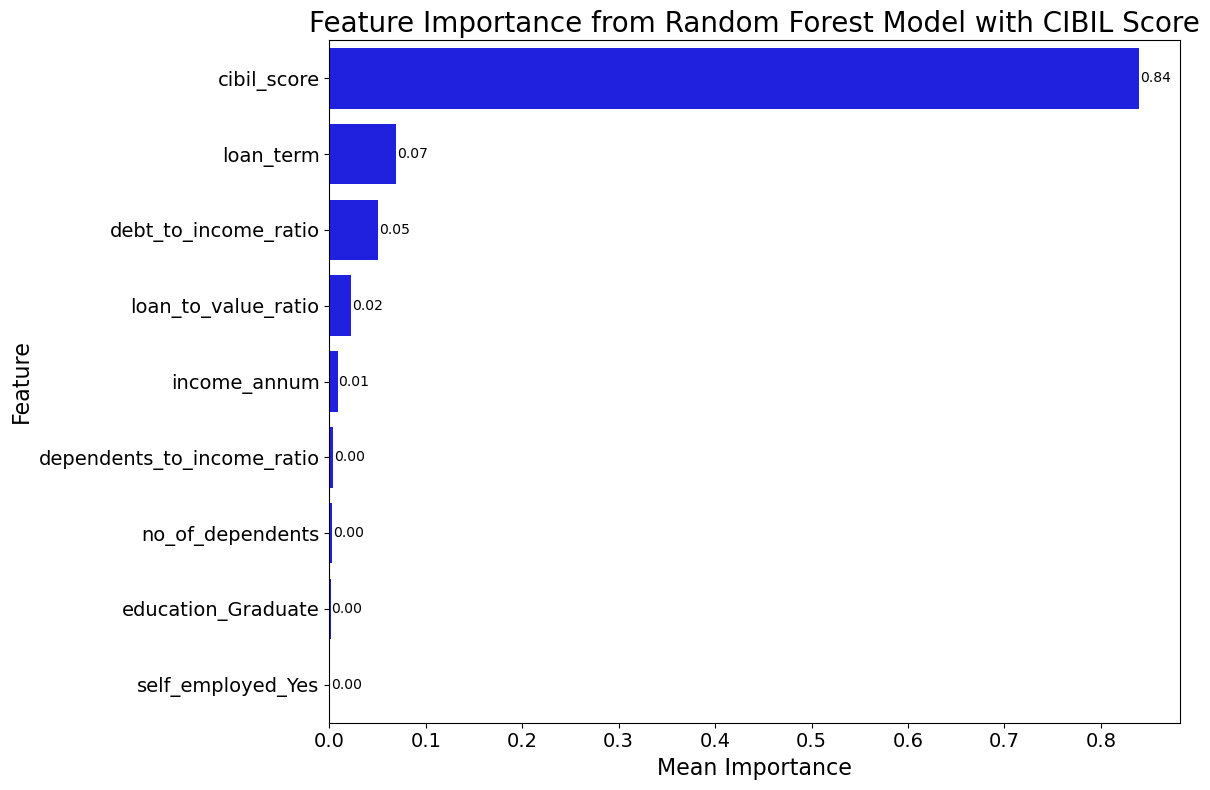

In [ ]:
# Calculate and display feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance from highest to lowest
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Importance', y='Feature', data=importance_df, color='blue')  # Change bar color to blue

# Add labels above each bar with 2 decimal places
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.2f}', va='center')  # Change to 2 decimal places

# Add title and axis labels
plt.title('Feature Importance from Random Forest Model with CIBIL Score', fontsize=20)  # Increase title size
plt.xlabel('Mean Importance', fontsize=16)  # Increase X-axis label size
plt.ylabel('Feature', fontsize=16)  # Increase Y-axis label size

# Adjust label sizes on the Y-axis and X-axis
plt.yticks(fontsize=14)  # Y-axis label size
plt.xticks(fontsize=14)  # X-axis label size

# Display the plot with a cleaner layout
plt.tight_layout()
plt.show()


The CIBIL score feature, with an importance of 0.84 in the Random Forest model, greatly dominates the prediction influence, indicating that the model relies heavily on this feature. In contrast, other features with an importance of 0.07 or lower contribute much less to the prediction outcome.
